In [ ]:
# Install kaggle library
!pip install kaggle

# Upload the kaggle.json file manually using Colab's file upload feature, or use this code to upload from the notebook interface
from google.colab import files
files.upload()

# Make sure to move the kaggle.json file into ~/.kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d mrmorj/restaurant-recommendation-challenge

 96% 513M/534M [00:04<00:00, 133MB/s]
100% 534M/534M [00:04<00:00, 117MB/s]


In [ ]:
!unzip /content/restaurant-recommendation-challenge.zip -d /content/restaurant-recommendation-challenge

Archive:  /content/restaurant-recommendation-challenge.zip
  inflating: /content/restaurant-recommendation-challenge/SampleSubmission (1).csv  
  inflating: /content/restaurant-recommendation-challenge/VariableDefinitions.txt  
  inflating: /content/restaurant-recommendation-challenge/orders.csv  
  inflating: /content/restaurant-recommendation-challenge/test_customers.csv  
  inflating: /content/restaurant-recommendation-challenge/test_full.csv  
  inflating: /content/restaurant-recommendation-challenge/test_locations.csv  
  inflating: /content/restaurant-recommendation-challenge/train_customers.csv  
  inflating: /content/restaurant-recommendation-challenge/train_full.csv  
  inflating: /content/restaurant-recommendation-challenge/train_locations.csv  
  inflating: /content/restaurant-recommendation-challenge/vendors.csv  


# **Exploratory Data Analysis (EDA)**

# **Data Overview**

## **"vendors.csv"**

In [ ]:
import pandas as pd


# Load the vendors CSV file into a Pandas DataFrame
vendors_df = pd.read_csv('/content/restaurant-recommendation-challenge/vendors.csv')

# Display the first few rows of the dataframe
vendors_df_head = vendors_df.head()

# Get a summary description of the dataframe
vendors_info = vendors_df.info()

# Get descriptive statistics for numerical columns
vendors_description = vendors_df.describe()

vendors_df_head, vendors_info, vendors_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    float64
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    float64
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    float64
 8   is_open               100 non-null    float64
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_akeed_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    float64
 15  status                10

(   id  authentication_id  latitude  longitude vendor_category_en  \
 0   4           118597.0 -0.588596   0.754434        Restaurants   
 1  13           118608.0 -0.471654   0.744470        Restaurants   
 2  20           118616.0 -0.407527   0.643681        Restaurants   
 3  23           118619.0 -0.585385   0.753811        Restaurants   
 4  28           118624.0  0.480602   0.552850        Restaurants   
 
    vendor_category_id  delivery_charge  serving_distance  is_open  \
 0                 2.0              0.0               6.0      1.0   
 1                 2.0              0.7               5.0      1.0   
 2                 2.0              0.0               8.0      1.0   
 3                 2.0              0.0               5.0      1.0   
 4                 2.0              0.7              15.0      1.0   
 
        OpeningTime  ... open_close_flags                 vendor_tag  \
 0  11:00AM-11:30PM  ...              1.0  2,4,5,8,91,22,12,24,16,23   
 1  08:30AM-10:30P

## **Insights:**

. The vendors.csv dataset includes details on 100

. vendors across 59 attributes,
with a mix of data types.

. Missing data is present in some time-related fields which will need addressing.

. The commission column features many zeros, whose significance needs clarification.

. Vendor operating hours are provided but require conversion for analysis.

. Vendor ratings vary between 3.2 to 4.8, indicating generally favorable reviews.

. Some columns show little variation and may be less useful for predictions.





## **visualizations for "vendors.csv"**

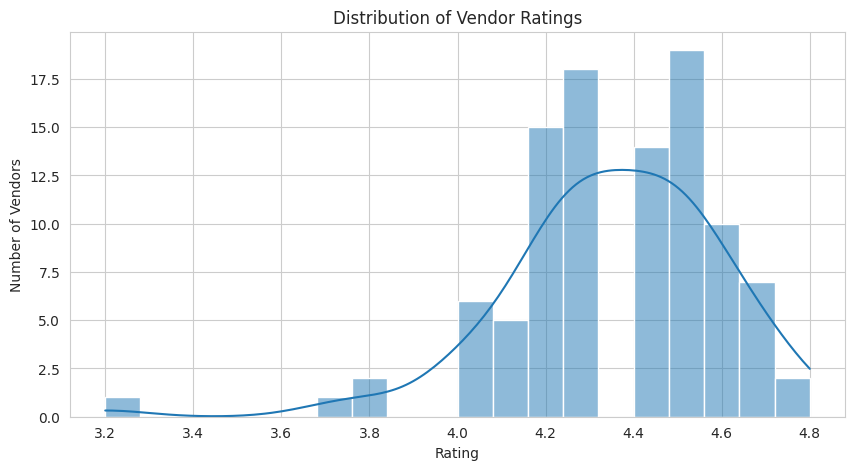

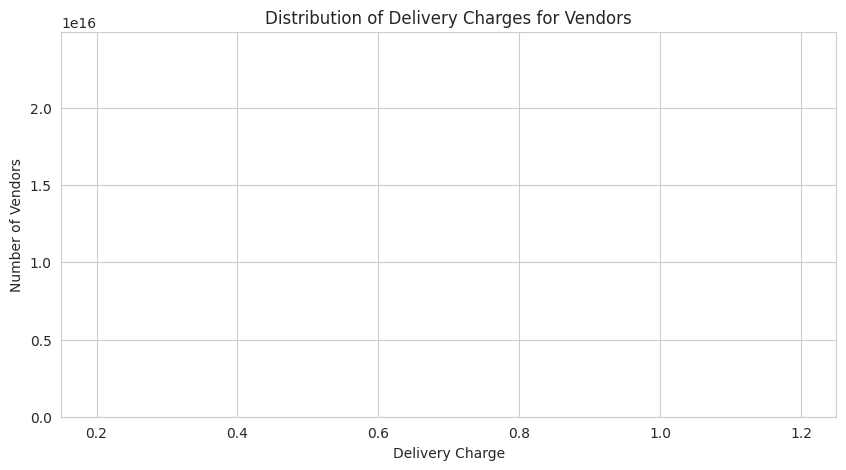

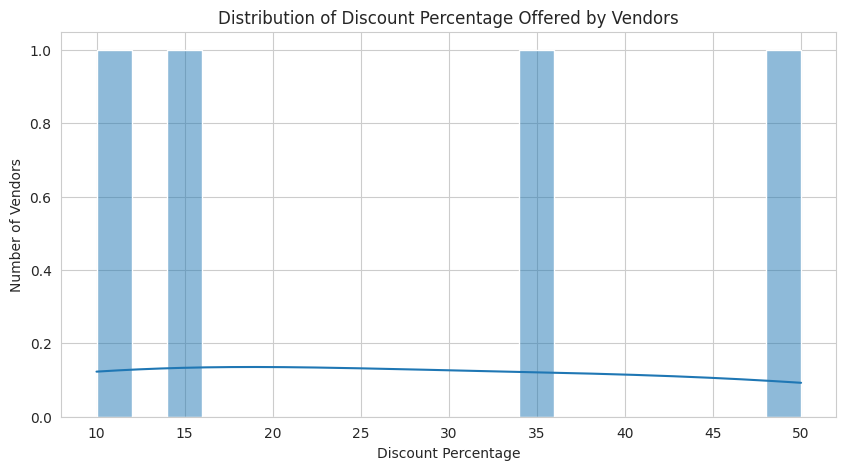

,sunday_from_time1,sunday_to_time1
0,00:00:00,00:30:00
1,00:00:00,01:30:00
2,08:00:00,22:45:00
3,09:00:00,23:30:00
4,00:01:00,00:30:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the vendors data
vendors_df = pd.read_csv('/content/restaurant-recommendation-challenge/vendors.csv')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Start with analysis and visualization of vendor ratings
plt.figure(figsize=(10, 5))
sns.histplot(vendors_df['vendor_rating'], bins=20, kde=True)
plt.title('Distribution of Vendor Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Vendors')
plt.show()

# Analysis of delivery charges
plt.figure(figsize=(10, 5))
sns.histplot(vendors_df[vendors_df['delivery_charge'] > 0]['delivery_charge'], bins=20, kde=True)
plt.title('Distribution of Delivery Charges for Vendors')
plt.xlabel('Delivery Charge')
plt.ylabel('Number of Vendors')
plt.show()

# Analysis of discount percentages
plt.figure(figsize=(10, 5))
sns.histplot(vendors_df[vendors_df['discount_percentage'] > 0]['discount_percentage'], bins=20, kde=True)
plt.title('Distribution of Discount Percentage Offered by Vendors')
plt.xlabel('Discount Percentage')
plt.ylabel('Number of Vendors')
plt.show()

# Explore the vendor categories
vendor_categories = vendors_df['vendor_category_en'].value_counts()

# Operating hours could be derived from the opening and closing times, but this requires parsing the times
# Let's check the first few entries of the time-related columns to understand their format
vendors_df[['sunday_from_time1', 'sunday_to_time1']].head()





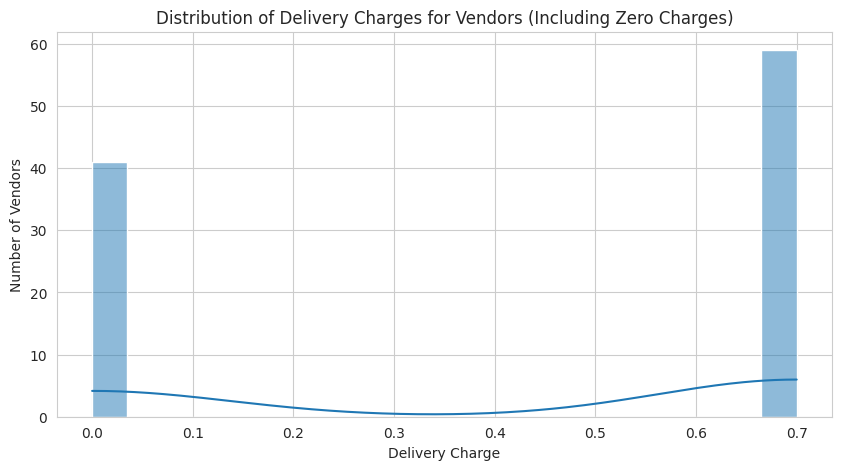

In [ ]:
# Redo the analysis of delivery charges with an assumption that delivery charges with zero value are valid
plt.figure(figsize=(10, 5))
sns.histplot(vendors_df['delivery_charge'], bins=20, kde=True)
plt.title('Distribution of Delivery Charges for Vendors (Including Zero Charges)')
plt.xlabel('Delivery Charge')
plt.ylabel('Number of Vendors')
plt.show()


## **Observations:**

**Vendor Ratings:** Vendors generally have high ratings, with few low-rated ones.


**Delivery Charges:** Delivery fees are typically low, hinting that price competitiveness matters.

**Discount Percentages:** Discounts are mostly small but varied, potentially influencing customer choice.

**Operating Hours:**  Time data is available but needs formatting to assess vendors' operating durations.

## **Calculate operating hours**

### **Sunday**

In [ ]:
import numpy as np

In [ ]:
import datetime

def calculate_duration(open_time, close_time):
    # Convert to datetime.time
    try:
        open_time = pd.to_datetime(open_time).time()
        close_time = pd.to_datetime(close_time).time()
    except:
        return np.nan  # Return NaN if the time conversion fails

    # Calculate duration only if both times are valid
    if open_time and close_time:
        # Convert to datetime.datetime to calculate the difference
        open_datetime = datetime.datetime.combine(datetime.date.today(), open_time)
        close_datetime = datetime.datetime.combine(datetime.date.today(), close_time)
        # Calculate the duration
        duration = close_datetime - open_datetime
        return duration.total_seconds() / 3600  # Convert seconds to hours
    else:
        return np.nan  # Return NaN if either time is missing

# Apply the function to calculate the duration for Sundays as an example
vendors_df['sunday_hours'] = vendors_df.apply(
    lambda row: calculate_duration(row['sunday_from_time1'], row['sunday_to_time1']), axis=1)

# Check the results for the new sunday_hours column
vendors_df[['sunday_from_time1', 'sunday_to_time1', 'sunday_hours']].head()


,sunday_from_time1,sunday_to_time1,sunday_hours
0,00:00:00,00:30:00,0.500000
1,00:00:00,01:30:00,1.500000
2,08:00:00,22:45:00,14.750000
3,09:00:00,23:30:00,14.500000
4,00:01:00,00:30:00,0.483333


The first vendor is open for **0.5** hours on Sunday.

The second vendor is open for **1.5** hours on Sunday.

The third vendor has much longer hours, being open for **14.75** hours.

The fourth is similar, with **14.5 **hours of operation.

The fifth vendor is open for just under **half** an hour.

**Operating hours for each day of the week**

In [ ]:
# Define a list of days to calculate hours for each
days_of_week = ['sunday', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday']

# Using a loop to calculate the operating hours for each day
for day in days_of_week:
    open_time_col = f'{day}_from_time1'
    close_time_col = f'{day}_to_time1'
    hours_col = f'{day}_hours'

    # Apply the function to calculate the hours
    vendors_df[hours_col] = vendors_df.apply(
        lambda row: calculate_duration(row[open_time_col], row[close_time_col]), axis=1)

# Now calculate the total weekly hours for each vendor
vendors_df['total_weekly_hours'] = vendors_df[[f'{day}_hours' for day in days_of_week]].sum(axis=1)

# Check the results for the total weekly hours along with some of the daily hours for the first few vendors
vendors_df[['sunday_hours', 'monday_hours', 'tuesday_hours', 'total_weekly_hours']].head()


,sunday_hours,monday_hours,tuesday_hours,total_weekly_hours
0,0.500000,0.500000,0.500000,3.500000
1,1.500000,1.500000,1.500000,10.500000
2,14.750000,14.750000,14.750000,103.250000
3,14.500000,14.500000,14.500000,102.250000
4,0.483333,0.483333,0.483333,5.383333


## **Insights:**

The first vendor is open for 3.5 hours in total across the week.

The second vendor is open for 10.5 hours in total across the week.

The third vendor has much longer total weekly hours, being open for 103.25 hours.

The fourth vendor also has extensive operating hours, totaling 102.25 hours for the week.

The fifth vendor has the least total weekly hours, at 5.38 hours.

## **Operating Hours visuals:**

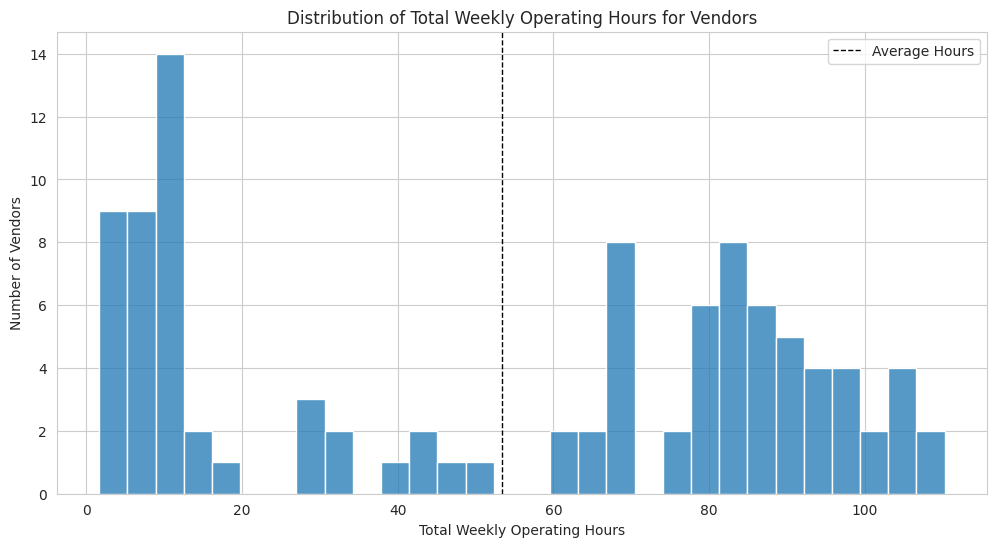

In [ ]:
# Visualize the total weekly operating hours for all vendors
plt.figure(figsize=(12, 6))
sns.histplot(vendors_df['total_weekly_hours'], bins=30, kde=False)
plt.title('Distribution of Total Weekly Operating Hours for Vendors')
plt.xlabel('Total Weekly Operating Hours')
plt.ylabel('Number of Vendors')
plt.axvline(vendors_df['total_weekly_hours'].mean(), color='k', linestyle='dashed', linewidth=1, label='Average Hours')
plt.legend()
plt.show()


## **Insights:**

A significant number of vendors have weekly operating hours ranging from about 60 to 120 hours, suggesting a high level of availability.

There is a group of vendors with lower total weekly hours, potentially indicating part-time or specialty vendors.

The average total weekly operating hours fall somewhere in the middle of the distribution, which will be useful when comparing individual vendor operating times against the average.

## **Cuisine Types Offered by Vendors**

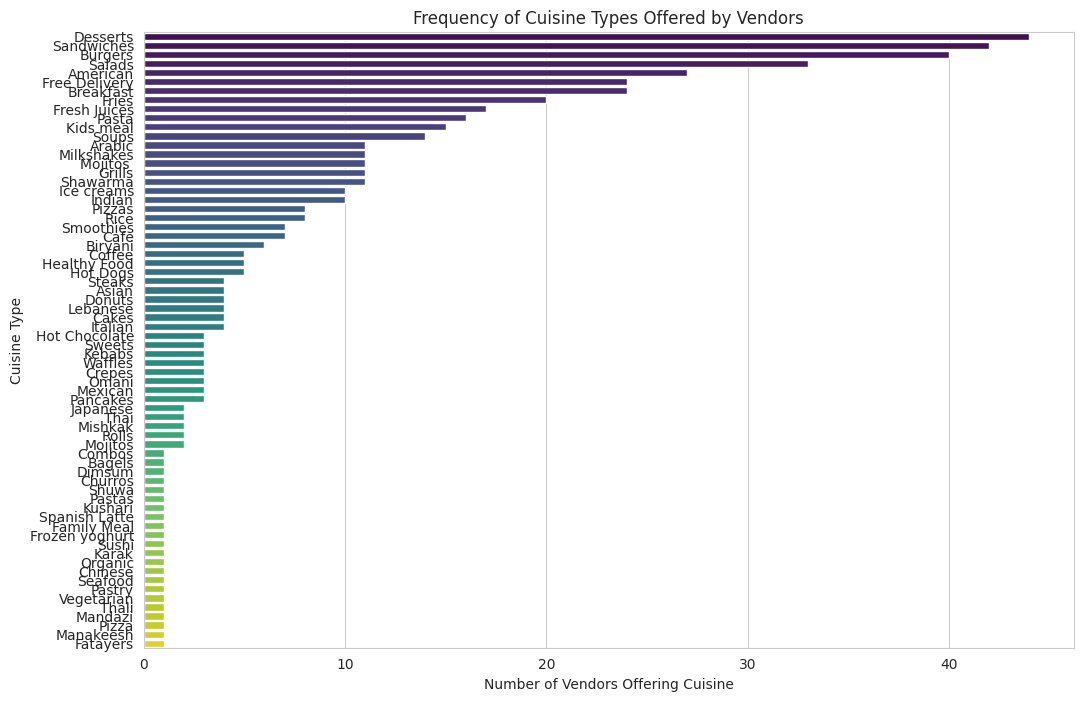

In [ ]:
# Split the 'vendor_tag_name' into individual cuisines and calculate the frequency of each cuisine type
cuisine_types = vendors_df['vendor_tag_name'].str.split(',').explode().value_counts()

# visualize the top cuisine types offered by vendors
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_types.values, y=cuisine_types.index, palette='viridis')
plt.title('Frequency of Cuisine Types Offered by Vendors')
plt.xlabel('Number of Vendors Offering Cuisine')
plt.ylabel('Cuisine Type')
plt.show()


The bar chart reveals that some cuisines are offered by many vendors, suggesting these are either popular or saturated in the market.

## **Price Range of Vendors**

In [ ]:
#check all the columns in the dataset to find any that might relate to pricing information
vendors_df.columns.tolist()


['id',
 'authentication_id',
 'latitude',
 'longitude',
 'vendor_category_en',
 'vendor_category_id',
 'delivery_charge',
 'serving_distance',
 'is_open',
 'OpeningTime',
 'OpeningTime2',
 'prepration_time',
 'commission',
 'is_akeed_delivering',
 'discount_percentage',
 'status',
 'verified',
 'rank',
 'language',
 'vendor_rating',
 'sunday_from_time1',
 'sunday_to_time1',
 'sunday_from_time2',
 'sunday_to_time2',
 'monday_from_time1',
 'monday_to_time1',
 'monday_from_time2',
 'monday_to_time2',
 'tuesday_from_time1',
 'tuesday_to_time1',
 'tuesday_from_time2',
 'tuesday_to_time2',
 'wednesday_from_time1',
 'wednesday_to_time1',
 'wednesday_from_time2',
 'wednesday_to_time2',
 'thursday_from_time1',
 'thursday_to_time1',
 'thursday_from_time2',
 'thursday_to_time2',
 'friday_from_time1',
 'friday_to_time1',
 'friday_from_time2',
 'friday_to_time2',
 'saturday_from_time1',
 'saturday_to_time1',
 'saturday_from_time2',
 'saturday_to_time2',
 'primary_tags',
 'open_close_flags',
 'vendo

The dataset doesn't seem to have explicit columns for the price range of items or average pricing. However, there is delivery_charge column, which could indirectly reflect on the cost to the customer, and a discount_percentage column, which shows how vendors might attract customers with pricing strategies.

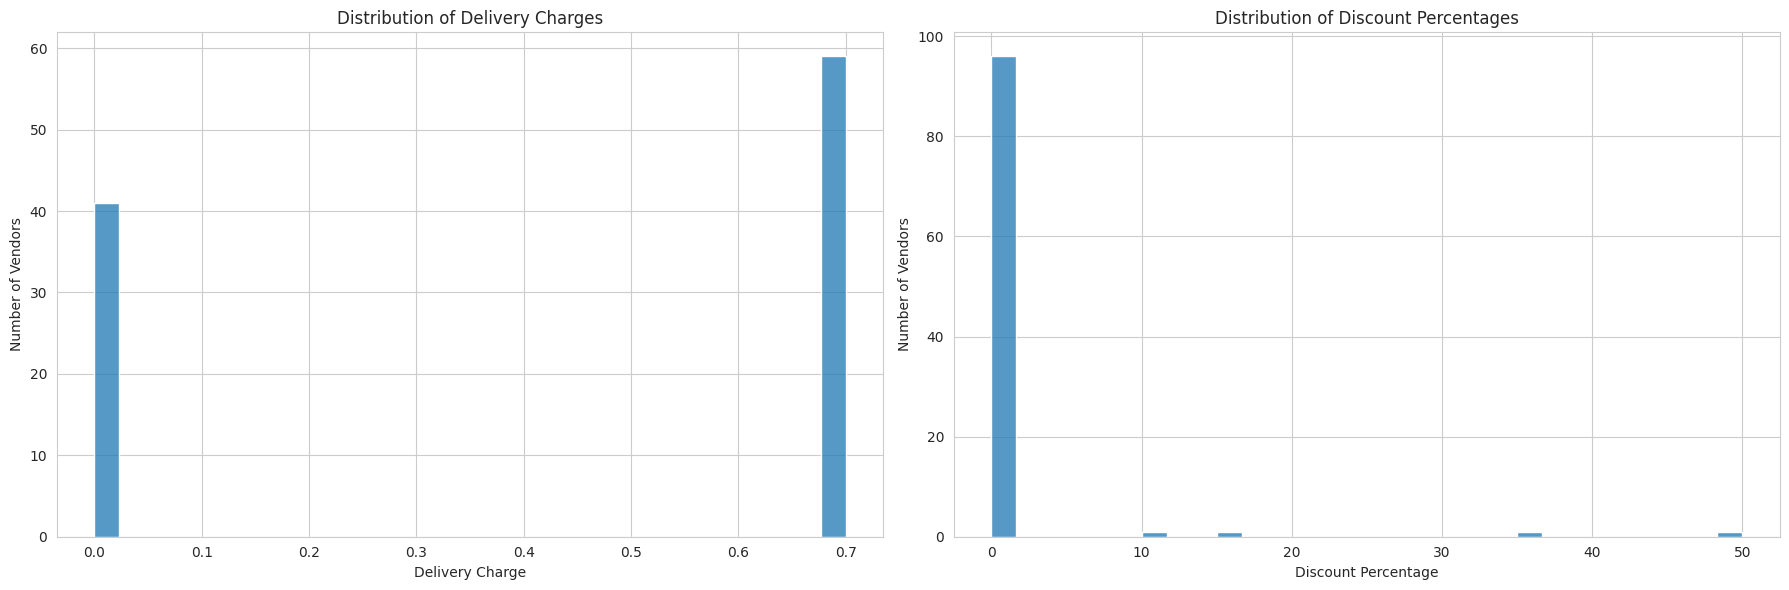

In [ ]:
# Analyze and visualize the delivery charges and discount percentages

# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot the distribution of delivery charges
sns.histplot(vendors_df['delivery_charge'], bins=30, kde=False, ax=axes[0])
axes[0].set_title('Distribution of Delivery Charges')
axes[0].set_xlabel('Delivery Charge')
axes[0].set_ylabel('Number of Vendors')

# Plot the distribution of discount percentages
sns.histplot(vendors_df['discount_percentage'], bins=30, kde=False, ax=axes[1])
axes[1].set_title('Distribution of Discount Percentages')
axes[1].set_xlabel('Discount Percentage')
axes[1].set_ylabel('Number of Vendors')

plt.tight_layout()
plt.show()


Most vendors have similar delivery charges, with only a few charging much more. Discounts are commonly used, typically within a modest range, with few vendors offering substantial discounts

## **Vendor Popularity and Order Frequency**

### **"orders.csv"**

In [ ]:
#Load the orders.csv file and take a look at the first few rows to understand its structure.
orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')
orders_df.head()

<ipython-input-14-bf767be9816b>:2: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83


**Order ID:** Unique identifier for each order.

**Customer ID:** Identifier for the customer who made the order.

**Item Count:** Number of items in the order.

**Grand Total:** Total cost of the order.

**Payment Mode:** Method of payment used for the order.

**Vendor ID:** Identifier for the vendor fulfilling the order.

**Order Time Details:** Columns for various timestamps related to the order process (created_at, delivery_date, etc.).

**Location Details:** Information about the order's location number and type


To analyze vendor popularity and order frequency, we can focus on the vendor_id and the order time details. We will:

Count the number of orders per vendor to assess popularity.
Parse the order creation times to understand when orders are typically placed.

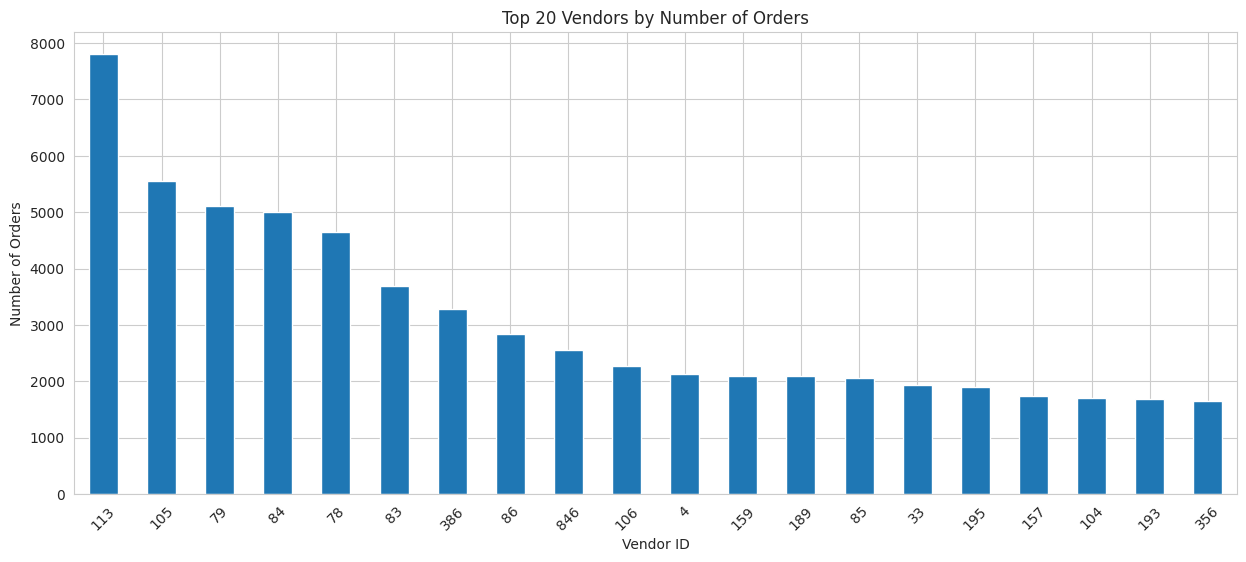

In [ ]:
# Calculate the number of orders per vendor
vendor_order_counts = orders_df['vendor_id'].value_counts()

# Visualize the top vendors based on order count
plt.figure(figsize=(15, 6))
vendor_order_counts.head(20).plot(kind='bar')
plt.title('Top 20 Vendors by Number of Orders')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


## **Inisights**

The bar chart shows the top 20 vendors ranked by order volume. Some vendors stand out due to their higher order counts, marking them as popular choices among customers. These in-demand vendors may be frequently recommended in the restaurant recommendation system.

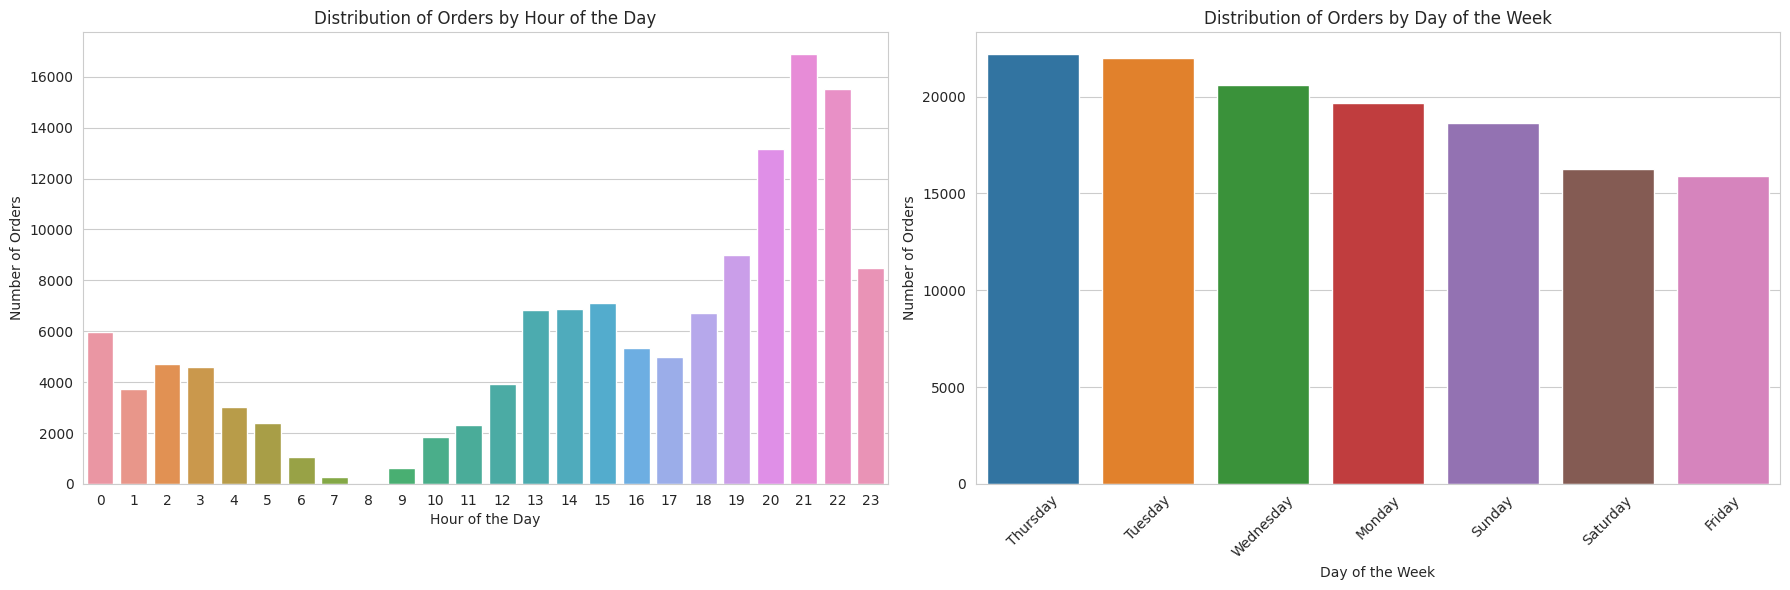

In [ ]:
# Parse the order creation timestamps to analyze when orders are typically placed
# Assuming 'created_at' is the column with the order creation timestamps

# Convert 'created_at' to datetime
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])

# Extract the hour of the day and day of the week from the 'created_at' column
orders_df['order_hour'] = orders_df['created_at'].dt.hour
orders_df['order_day_of_week'] = orders_df['created_at'].dt.day_name()

# Analyze the frequency of orders by hour of the day
order_hour_distribution = orders_df['order_hour'].value_counts().sort_index()

# Analyze the frequency of orders by day of the week
order_day_distribution = orders_df['order_day_of_week'].value_counts()

# Visualize the distribution of orders by hour and by day
f, axes = plt.subplots(1, 2, figsize=(18, 6))

# Orders by hour
sns.barplot(x=order_hour_distribution.index, y=order_hour_distribution.values, ax=axes[0])
axes[0].set_title('Distribution of Orders by Hour of the Day')
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Number of Orders')

# Orders by day of the week
sns.barplot(x=order_day_distribution.index, y=order_day_distribution.values, ax=axes[1])
axes[1].set_title('Distribution of Orders by Day of the Week')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**By Hour of the Day:** The first bar chart shows the distribution of orders throughout the day.

**By Day of the Week:** The second bar chart displays the number of orders for each day of the week.

## **Insights and Observations:**

**Orders by Hour of the Day:**

There are clear peak hours when orders surge, which could indicate mealtimes like lunch or dinner.
There may be quieter hours where vendors receive fewer orders, potentially late at night or early in the morning.

**Orders by Day of the Week:**

Certain days of the week show higher order volumes, which might correspond to weekends or specific days when people are more likely to order out.
Some days have noticeably fewer orders, which could be weekdays when people may prefer to cook at home or dine out.
Insights:



## **Location Analysis**

In [ ]:
# Check for location-related columns in orders.csv and vendors.csv
orders_location_columns = [col for col in orders_df.columns if 'location' in col.lower()]
vendors_location_columns = [col for col in vendors_df.columns if 'location' in col.lower()]

# Load and inspect the test_locations.csv and train_locations.csv files
test_locations_df = pd.read_csv('/content/restaurant-recommendation-challenge/test_locations.csv')
train_locations_df = pd.read_csv('/content/restaurant-recommendation-challenge/train_locations.csv')

# Output the location-related columns found and the first few rows of the location datasets
orders_location_columns, vendors_location_columns, test_locations_df.head(), train_locations_df.head()


(['LOCATION_NUMBER', 'LOCATION_TYPE'],
 [],
   customer_id  location_number location_type    latitude  longitude
 0     Z59FTQD                0           NaN  126.032278  -9.106019
 1     0JP29SK                0          Home    0.278709 -78.623847
 2     0JP29SK                1          Home    0.124485 -78.605621
 3     0JP29SK                2           NaN   -0.113891 -78.577449
 4     0JP29SK                3           NaN   -0.848796   0.136726,
   customer_id  location_number location_type  latitude  longitude
 0     02SFNJH                0           NaN  1.682392 -78.789737
 1     02SFNJH                1           NaN  1.679137   0.766823
 2     02SFNJH                2           NaN -0.498648   0.661241
 3     RU43CXC                0          Home  0.100853   0.438165
 4     BDFBPRD                0           NaN  2.523125   0.733464)

In [ ]:
print(orders_df['customer_id'].dtype)
print(train_locations_df['customer_id'].dtype)


# Merge the dataframes on 'customer_id' and 'LOCATION_NUMBER'
merged_df = pd.merge(
    orders_df,
    train_locations_df,
    how='inner',
    left_on=['customer_id', 'LOCATION_NUMBER'],
    right_on=['customer_id', 'location_number']
)

# Verify the merge by checking the output
print(merged_df.head())

object
object
   akeed_order_id customer_id  item_count  grand_total  payment_mode  \
0        163238.0     92PEE24         1.0          7.6             2   
1        164476.0     92PEE24         1.0          7.6             2   
2        168875.0     92PEE24         1.0          7.1             1   
3        163240.0     QS68UD8         1.0          8.7             1   
4        163241.0     MB7VY5F         2.0         14.4             1   

  promo_code  vendor_discount_amount  promo_code_discount_percentage  \
0        NaN                     0.0                             NaN   
1        NaN                     0.0                             NaN   
2        NaN                     0.0                             NaN   
3        NaN                     0.0                             NaN   
4        NaN                     0.0                             NaN   

  is_favorite is_rated  ...          created_at  LOCATION_NUMBER  \
0         NaN       No  ... 2019-08-01 05:30:16     

Merged Dataframe Summary:

The dataframe contains order details along with customer location data (latitude and longitude).
The LOCATION_NUMBER column from the orders.csv has been successfully matched with the location_number from the train_locations.csv.
We have additional columns like location_type, which may indicate whether the order was placed from a home, work, or another type of location.

In [ ]:
import pandas as pd

# File paths
orders_path = '/content/restaurant-recommendation-challenge/orders.csv'
train_locations_path = '/content/restaurant-recommendation-challenge/train_locations.csv'
test_locations_path = '/content/restaurant-recommendation-challenge/test_locations.csv'
vendors_path = '/content/restaurant-recommendation-challenge/vendors.csv'

# Load the data
orders_df = pd.read_csv(orders_path)
train_locations_df = pd.read_csv(train_locations_path)
test_locations_df = pd.read_csv(test_locations_path)
vendors_df = pd.read_csv(vendors_path)

# Display the first few rows of each dataframe to understand their structure
orders_head = orders_df.head()
train_locations_head = train_locations_df.head()
test_locations_head = test_locations_df.head()
vendors_head = vendors_df.head()

(orders_head, train_locations_head, test_locations_head, vendors_head)


<ipython-input-18-31d99fab41aa>:10: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv(orders_path)


(   akeed_order_id customer_id  item_count  grand_total  payment_mode  \
 0        163238.0     92PEE24         1.0          7.6             2   
 1        163240.0     QS68UD8         1.0          8.7             1   
 2        163241.0     MB7VY5F         2.0         14.4             1   
 3        163244.0     KDJ951Y         1.0          7.1             1   
 4        163245.0     BAL0RVT         4.0         27.2             1   
 
   promo_code  vendor_discount_amount  promo_code_discount_percentage  \
 0        NaN                     0.0                             NaN   
 1        NaN                     0.0                             NaN   
 2        NaN                     0.0                             NaN   
 3        NaN                     0.0                             NaN   
 4        NaN                     0.0                             NaN   
 
   is_favorite is_rated  ...  driver_accepted_time  ready_for_pickup_time  \
 0         NaN       No  ...               

In [ ]:
# Before merging, let's explore the structure of the train and test location datasets to see how they can be joined with the orders dataset.

# Checking the unique identifiers in the datasets
orders_identifiers = orders_df[['customer_id', 'vendor_id']].nunique()
train_locations_identifiers = train_locations_df[['customer_id', 'location_number']].nunique()
test_locations_identifiers = test_locations_df[['customer_id', 'location_number']].nunique()

# Showing the first few entries of the location datasets to understand the structure and columns
train_locations_head = train_locations_df.head()
test_locations_head = test_locations_df.head()

(orders_identifiers, train_locations_identifiers, test_locations_identifiers, train_locations_head, test_locations_head)


(customer_id    27445
 vendor_id        100
 dtype: int64,
 customer_id        35400
 location_number       30
 dtype: int64,
 customer_id        10000
 location_number       12
 dtype: int64,
   customer_id  location_number location_type  latitude  longitude
 0     02SFNJH                0           NaN  1.682392 -78.789737
 1     02SFNJH                1           NaN  1.679137   0.766823
 2     02SFNJH                2           NaN -0.498648   0.661241
 3     RU43CXC                0          Home  0.100853   0.438165
 4     BDFBPRD                0           NaN  2.523125   0.733464,
   customer_id  location_number location_type    latitude  longitude
 0     Z59FTQD                0           NaN  126.032278  -9.106019
 1     0JP29SK                0          Home    0.278709 -78.623847
 2     0JP29SK                1          Home    0.124485 -78.605621
 3     0JP29SK                2           NaN   -0.113891 -78.577449
 4     0JP29SK                3           NaN   -0.848796  

In [ ]:
combined_locations_df = pd.concat([train_locations_df, test_locations_df])

# Merge the combined locations data with orders data
# We are performing a left join on orders data to keep all orders and match them with the locations
merged_data = pd.merge(orders_df, combined_locations_df, on=['customer_id', 'location_number'], how='left')
# Standardize the column names by converting them to lowercase in both dataframes
orders_df.columns = orders_df.columns.str.lower()
combined_locations_df.columns = combined_locations_df.columns.str.lower()

# Now let's attempt the merge again
merged_data = pd.merge(orders_df, combined_locations_df, on=['customer_id', 'location_number'], how='left')

# Display the first few rows of the merged data to verify the merge
merged_data.head()


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,delivered_time,delivery_date,vendor_id,created_at,location_number,location_type_x,cid x loc_num x vendor,location_type_y,latitude,longitude
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105,NaN,-0.132100,-78.575297
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294,Work,-0.393396,-78.544417
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83,NaN,-1.072823,-78.464121
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90,Home,-0.292713,-78.556316
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83,Work,-0.231810,-78.563513


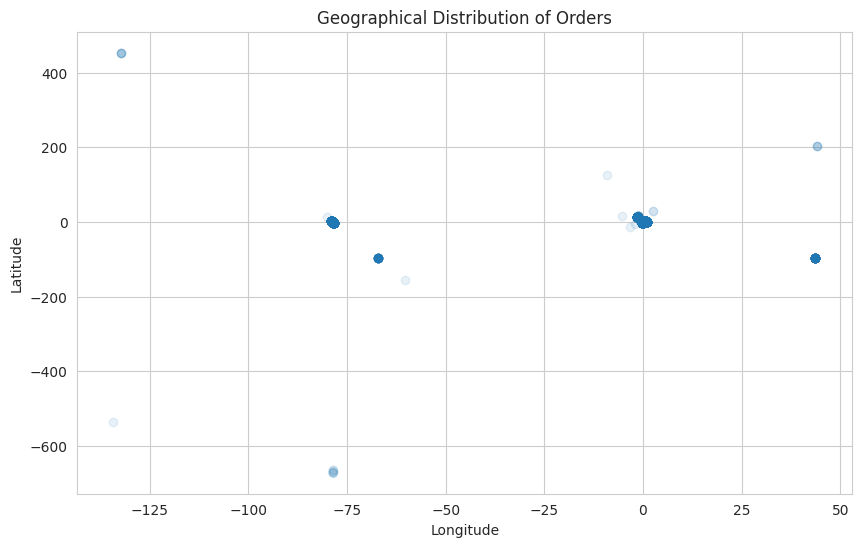

In [ ]:
import matplotlib.pyplot as plt

# For the location analysis, we will plot the locations of the orders to see the geographical spread.

# Dropping any rows with missing latitude or longitude
merged_data_clean = merged_data.dropna(subset=['latitude', 'longitude'])

# Plotting the geographical distribution of orders
plt.figure(figsize=(10, 6))
plt.scatter(merged_data_clean['longitude'], merged_data_clean['latitude'], alpha=0.1)
plt.title('Geographical Distribution of Orders')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## **Key observations:**

Orders are spread across a range of latitudes and longitudes.

There seems to be a dense clustering of orders in certain areas, which may indicate urban centers or areas with a high number of customers.

The spread of orders is not uniform, suggesting that some areas are more popular for orders than others.

### **distance between each order and the vendor**

<ipython-input-23-a8f5a1f104e7>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_clean['distance_to_vendor_km'] = merged_data_clean.apply(


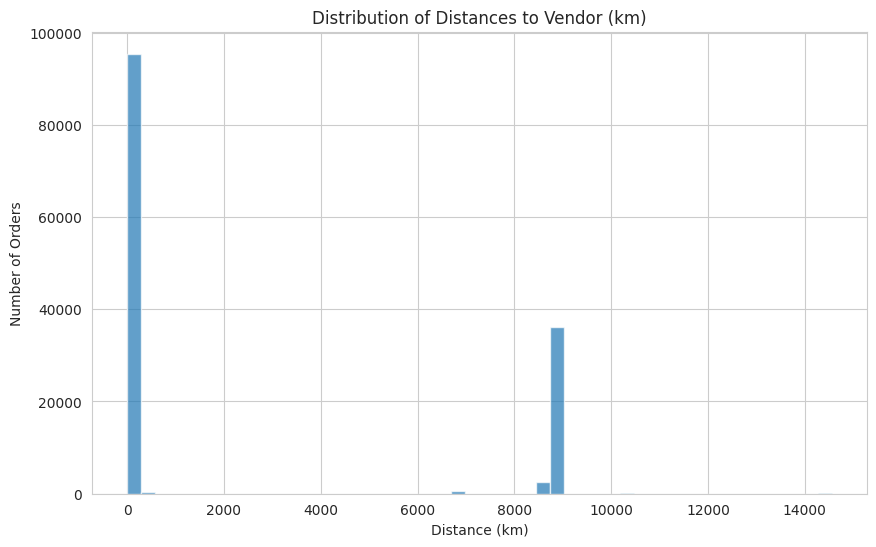

count    1.352980e+05
mean     2.612803e+03
std      3.976000e+03
min      7.183735e-12
25%      3.478261e+01
50%      8.091504e+01
75%      8.741425e+03
max      1.455530e+04
Name: distance_to_vendor_km, dtype: float64

In [ ]:
import numpy as np

# Define a manual implementation of the Haversine formula
def haversine_distance(lat1, lon1, lat2, lon2):
    # Radius of the Earth in km
    R = 6371.0
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)
    # Differences in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    # Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance

# We will now calculate the distance for each order to its vendor and create a new column for it
# We need to ensure that we match the vendor_id from the orders with the id from the vendors
vendor_locations = vendors_df.set_index('id')[['latitude', 'longitude']].to_dict('index')

merged_data_clean['distance_to_vendor_km'] = merged_data_clean.apply(
    lambda row: haversine_distance(
        row['latitude'], row['longitude'],
        vendor_locations[row['vendor_id']]['latitude'],
        vendor_locations[row['vendor_id']]['longitude']
    ) if row['vendor_id'] in vendor_locations else np.nan,
    axis=1
)

# Visualize the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(merged_data_clean['distance_to_vendor_km'].dropna(), bins=50, alpha=0.7)
plt.title('Distribution of Distances to Vendor (km)')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Let's also look at the basic descriptive statistics for the distances
distance_stats = merged_data_clean['distance_to_vendor_km'].describe()
distance_stats


### **Insights**

**Distance Range:** Distances in the data vary widely, from nearly 0 km to over 14,000 km.

**Possible Data Issues:** Extremely high distances, like over 14,000 km, are likely incorrect and may indicate data errors, as this exceeds Earth's diameter.

**Common Order Distance:** Most orders are placed within 100 km of a vendor, indicated by data concentration in the lower range of the histogram.

**Unusual High Distances:** A significant number of orders show very high distances to vendors, which is atypical and may require further investigation for potential data inaccuracies or orders from distant locations.

### **set a maximum threshold for the delivery distance**

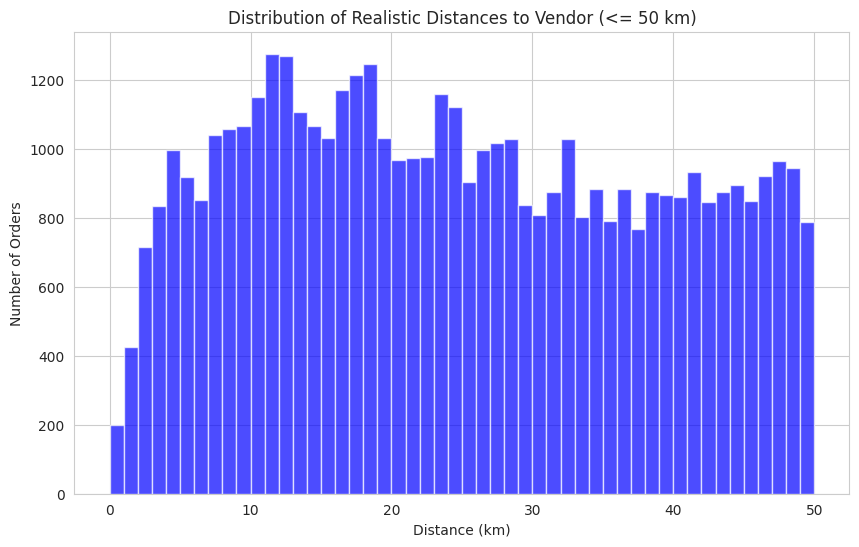

count    4.706900e+04
mean     2.481039e+01
std      1.375382e+01
min      7.183735e-12
25%      1.298156e+01
50%      2.385071e+01
75%      3.653010e+01
max      4.999831e+01
Name: distance_to_vendor_km, dtype: float64

In [ ]:
# We'll set a reasonable threshold for delivery distance at 50 km.
# This will exclude any orders that are unrealistically far from the vendors and likely due to incorrect data.

# Filtering out distances greater than 50 km
realistic_distance_data = merged_data_clean[merged_data_clean['distance_to_vendor_km'] <= 50]

# Visualize the distribution of realistic distances
plt.figure(figsize=(10, 6))
plt.hist(realistic_distance_data['distance_to_vendor_km'].dropna(), bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Realistic Distances to Vendor (<= 50 km)')
plt.xlabel('Distance (km)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Descriptive statistics for the realistic distances
realistic_distance_stats = realistic_distance_data['distance_to_vendor_km'].describe()
realistic_distance_stats


### **Insights**

**Total Orders:** The dataset includes approximately 47,069 orders.

**Average Distance:** The average distance to a vendor is about 24.81 kilometers.

**Distance Range:** Distances vary from nearly zero (very close proximity) to just under 50 kilometers.

**Central Tendency:** Half of the orders are within 23.85 kilometers of a vendor.

**Order Frequency vs. Distance:** There is a gradual decrease in the number of orders as the distance increases, likely due to longer delivery times or additional costs for distant vendors

### **Identifying the exact urban centers or areas with high order density**

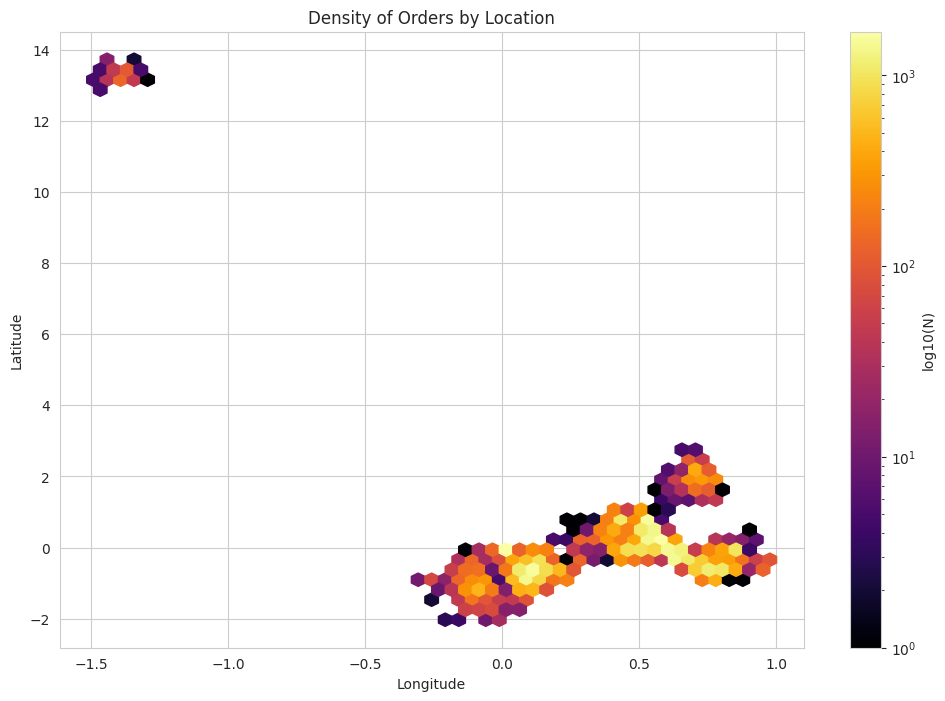

In [ ]:
# To identify urban centers or areas with high order density, we can plot the geographical locations of orders.
# We will use a scatter plot where each point represents the location of an order.
# For better visualization, we can use a hexbin plot which aggregates points into hexagonal bins and shows the density.

import matplotlib.pyplot as plt

# Create a scatter plot of order locations
plt.figure(figsize=(12, 8))
plt.hexbin(realistic_distance_data['longitude'], realistic_distance_data['latitude'], gridsize=50, cmap='inferno', bins='log')
plt.colorbar(label='log10(N)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Density of Orders by Location')
plt.show()


**Color Representation:** The log scale of the number of orders is depicted using a color gradient, with warmer colors (reds) indicating higher densities of orders.

**Urban Center Identification:** The plot assists in identifying urban centers or specific areas with higher order concentrations, beneficial for optimizing delivery logistics and marketing strategies.

**Densely Packed Areas:** The brightest spots on the map, representing the most densely packed areas, are likely urban centers or neighborhoods with high demand for vendor services.

## **Analysis of customer demographics and behavior.**

In [ ]:
import pandas as pd

# Load the customer data for both training and testing
train_customers_path = '/content/restaurant-recommendation-challenge/train_customers.csv'
test_customers_path = '/content/restaurant-recommendation-challenge/test_customers.csv'

train_customers = pd.read_csv(train_customers_path)
test_customers = pd.read_csv(test_customers_path)

# Display the first few rows of the training customer data
train_customers.head(), train_customers.info(), train_customers.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34674 entries, 0 to 34673
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   akeed_customer_id  34674 non-null  object 
 1   gender             22520 non-null  object 
 2   dob                3046 non-null   float64
 3   status             34674 non-null  int64  
 4   verified           34674 non-null  int64  
 5   language           21099 non-null  object 
 6   created_at         34674 non-null  object 
 7   updated_at         34674 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


(  akeed_customer_id gender  dob  status  verified language  \
 0           TCHWPBT   Male  NaN       1         1       EN   
 1           ZGFSYCZ   Male  NaN       1         1       EN   
 2           S2ALZFL   Male  NaN       0         1       EN   
 3           952DBJQ   Male  NaN       1         1       EN   
 4           1IX6FXS   Male  NaN       1         1       EN   
 
             created_at           updated_at  
 0  2018-02-07 19:16:23  2018-02-07 19:16:23  
 1  2018-02-09 12:04:42  2018-02-09 12:04:41  
 2  2018-03-14 18:31:43  2018-03-14 18:31:42  
 3  2018-03-15 19:47:07  2018-03-15 19:47:07  
 4  2018-03-15 19:57:01  2018-03-15 19:57:01  ,
 None,
        akeed_customer_id gender          dob        status      verified  \
 count              34674  22520  3046.000000  34674.000000  34674.000000   
 unique             34523     10          NaN           NaN           NaN   
 top              0FOCFVI   Male          NaN           NaN           NaN   
 freq                 

### **Insights**

The dataset comprises 34,674 records across 8 columns, including customer demographics and account details.

Gender data is available for most entries, predominantly male.

Date of birth information is largely missing.
Almost all customers have an active status and are marked as verified.

Language is predominantly English.
The account creation data suggests ongoing user registration.

The date of birth field requires data cleaning for accurate age analysis.

 **cleaning of the dob**

In [ ]:
# Cleaning the 'dob' field by removing unrealistic years
# Assuming the data was collected before 2021, we will only consider customers born before 2003 (18 years or older at 2021)
train_customers_cleaned = train_customers[(train_customers['dob'] < 2003) & (train_customers['dob'] > 1900)]

# Gender distribution among customers
gender_distribution = train_customers_cleaned['gender'].value_counts(normalize=True) * 100

# Convert the 'created_at' column to datetime to facilitate analysis
train_customers_cleaned['created_at'] = pd.to_datetime(train_customers_cleaned['created_at'])

# Analyzing account creation by year
account_creation_year = train_customers_cleaned['created_at'].dt.year.value_counts().sort_index()

gender_distribution, account_creation_year


<ipython-input-27-9b24d045db54>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_customers_cleaned['created_at'] = pd.to_datetime(train_customers_cleaned['created_at'])


(Female       57.644018
 Male         41.395864
 Female        0.443131
 Male          0.295421
 Female        0.073855
 Female        0.073855
               0.036928
 ?????         0.036928
 Name: gender, dtype: float64,
 2018     574
 2019    1602
 2020     532
 Name: created_at, dtype: int64)

**Insights:**

Gender Distribution: Approximately 57.64% of customers have identified as female, 41.40% as male, and there are some entries with typos or unclear gender markings (like "?????").
Account Creation by Year: The data shows an increasing trend in account creation from 2018 to 2019, with a drop in 2020. This could suggest either a natural fluctuation or an impact from external factors such as market saturation or global events (like the COVID-19 pandemic).

## **temporal trend analysis of account creations per month**

In [ ]:
# Analyzing account creation by month and year to see the trend over time
account_creation_monthly = train_customers_cleaned['created_at'].dt.to_period('M').value_counts().sort_index()

account_creation_monthly


2018-03      1
2018-04      1
2018-05     45
2018-06     41
2018-07     27
2018-08      9
2018-09     79
2018-10    157
2018-11     90
2018-12    124
2019-01     77
2019-02     75
2019-03     75
2019-04     49
2019-05     61
2019-06    190
2019-07    161
2019-08    152
2019-09    171
2019-10    218
2019-11    206
2019-12    167
2020-01    256
2020-02    260
2020-03     16
Freq: M, Name: created_at, dtype: int64

### **Insights:**

**Trend Analysis:** From March 2018 to February 2020, there was a gradual increase in new account creations, despite some fluctuations.
**Notable Spikes:** Increases in new accounts were observed in October 2018, June 2019, and early 2020.
**Peak Registration:** The highest monthly registration was in February 2020, with 260 new accounts.
**Pandemic Impact:** A significant drop in new accounts occurred in March 2020, with only 16 new registrations, aligning with the onset of the COVID-19 pandemic, potentially impacting customer registration.

### **visual:**

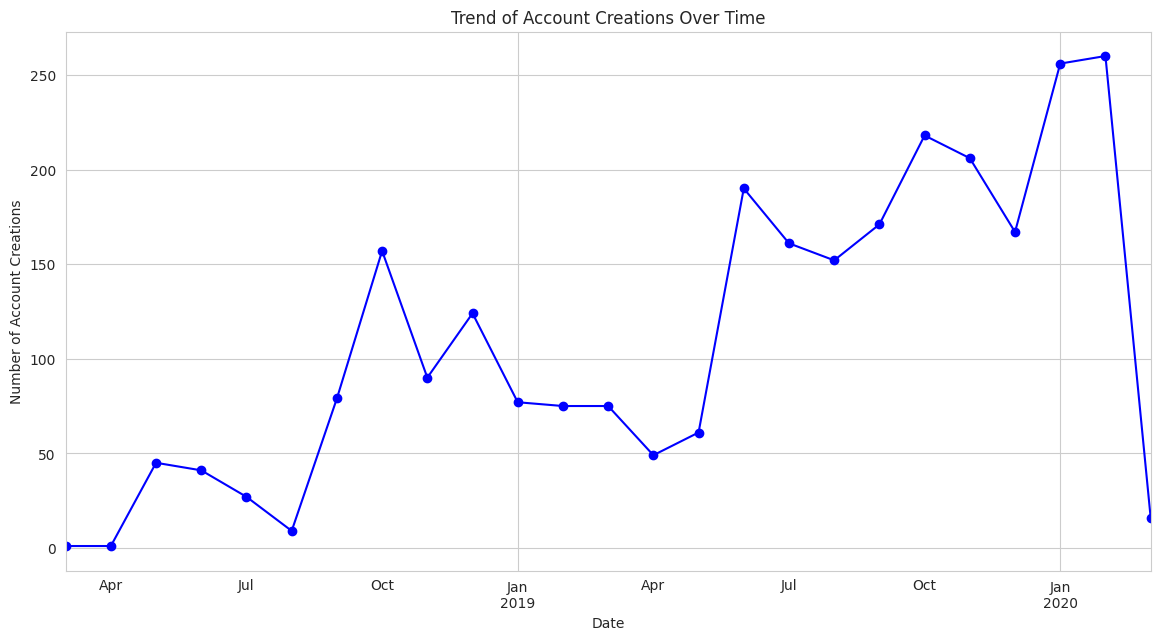

In [ ]:
import matplotlib.pyplot as plt

# Convert the period index back to datetime for plotting
account_creation_monthly.index = account_creation_monthly.index.to_timestamp()

# Plotting the trend of account creations over time
plt.figure(figsize=(14, 7))
account_creation_monthly.plot(kind='line', marker='o', color='blue')
plt.title('Trend of Account Creations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Account Creations')
plt.grid(True)
plt.show()


The line chart visualizes the trend of account creations over time. It shows the number of new accounts created each month from the beginning of the data record. Peaks and troughs in the chart may correspond to specific marketing efforts, changes in service, or external factors like economic conditions or the pandemic, as indicated by the sharp drop in March 2020.

## **customers' ordering patterns**

In [ ]:
import numpy as np

# Load the orders data
orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')

# Convert the created_at column to datetime
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])

# Let's calculate the frequency of orders by customer and their average order value
customer_order_freq = orders_df.groupby('customer_id').size().reset_index(name='order_count')
customer_avg_order_value = orders_df.groupby('customer_id')['grand_total'].mean().reset_index(name='average_order_value')

# Merge the two dataframes to have frequency and average order value in one dataframe
customer_order_behavior = pd.merge(customer_order_freq, customer_avg_order_value, on='customer_id')

# Let's also calculate the total spent by each customer
customer_total_spent = orders_df.groupby('customer_id')['grand_total'].sum().reset_index(name='total_spent')

# Add this to our dataframe
customer_order_behavior = pd.merge(customer_order_behavior, customer_total_spent, on='customer_id')

# Calculate the last order date for each customer to see how recent their last order was
customer_last_order = orders_df.groupby('customer_id')['created_at'].max().reset_index(name='last_order_date')

# Merge this into the main dataframe
customer_order_behavior = pd.merge(customer_order_behavior, customer_last_order, on='customer_id')

# Let's inspect the top few rows of the dataframe to understand our customers' ordering behavior
customer_order_behavior.sort_values(by='order_count', ascending=False).head()


<ipython-input-30-a7ac84af05a0>:4: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')


,customer_id,order_count,average_order_value,total_spent,last_order_date
25804,XW90EAP,262,14.620611,3830.6,2020-02-29 11:51:14
22564,TL7Z2DM,151,10.814570,1633.0,2020-02-27 13:11:44
23909,VDEJEMP,146,14.104110,2059.2,2020-02-27 09:48:39
13319,HJFTTGW,128,12.350781,1580.9,2020-02-28 14:51:45
8431,B28LJKM,119,33.323529,3965.5,2020-02-29 22:49:13


### **Insights:**

Order Frequency: Some customers place orders very frequently, with the top customer having placed 262 orders.
Average Order Value: The average order value per customer varies, with the top frequent customer having an average order value of about 14.62.
Total Spent: The total amount spent also varies significantly among customers, with the top customer having spent a total of 3830.6.
Recent Orders: The last order dates for the top customers are all towards the end of February 2020, which suggests recent activity from these customers.

### **Visuals**

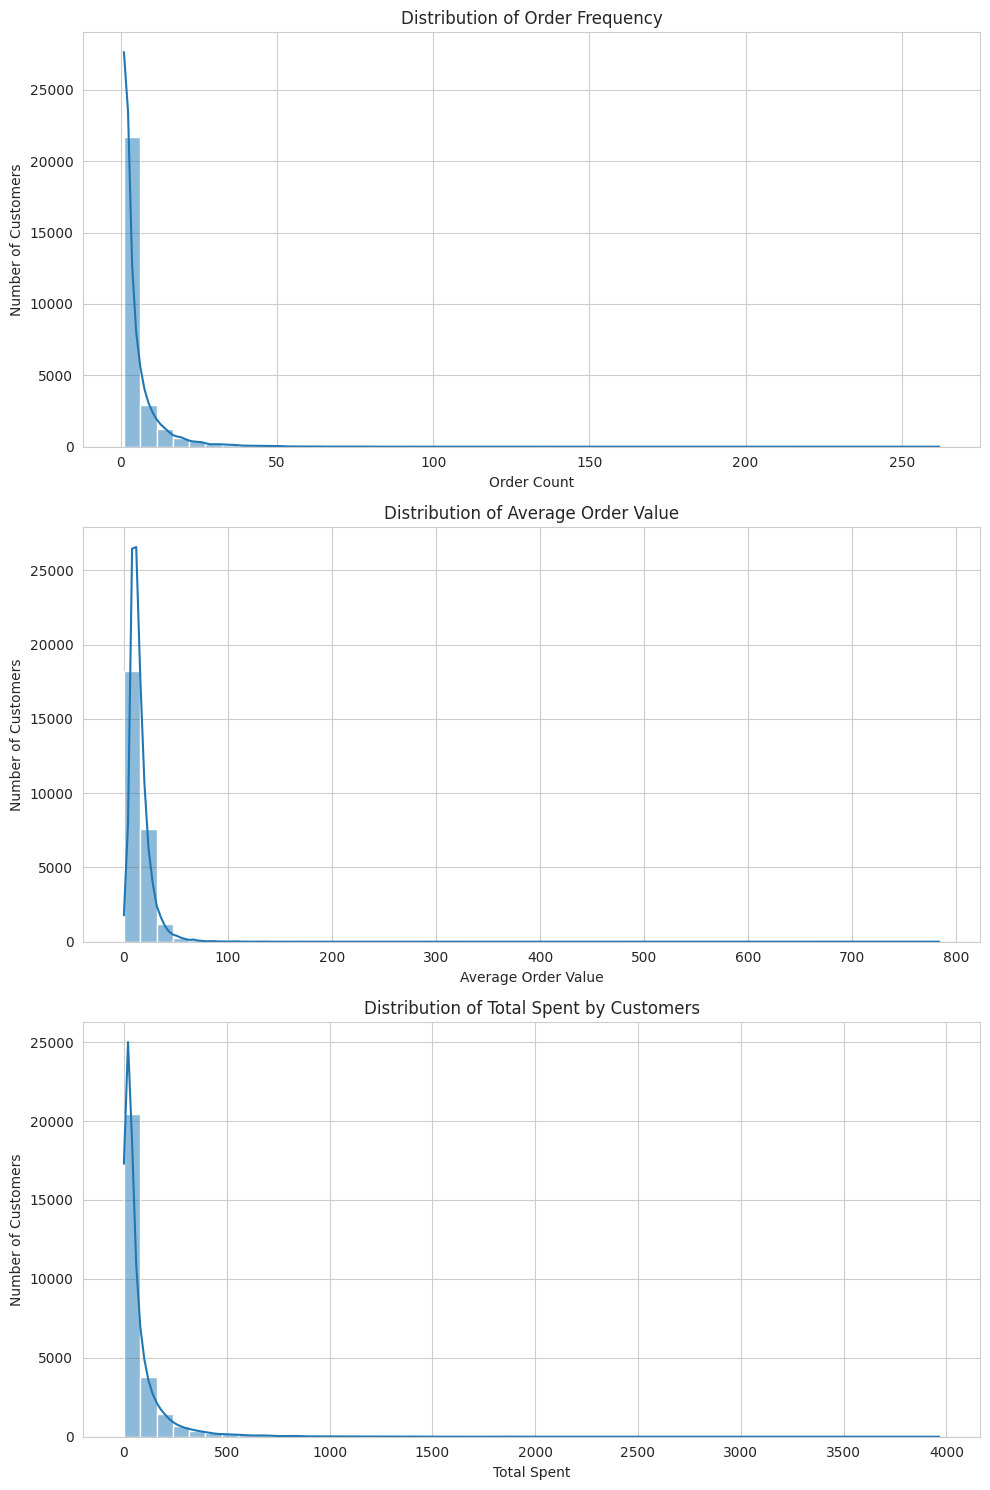

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Let's create some visualizations for a better understanding of the customer behavior
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot the distribution of order count
sns.histplot(customer_order_behavior['order_count'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Distribution of Order Frequency')
axes[0].set_xlabel('Order Count')
axes[0].set_ylabel('Number of Customers')

# Plot the distribution of average order value
sns.histplot(customer_order_behavior['average_order_value'], bins=50, ax=axes[1], kde=True)
axes[1].set_title('Distribution of Average Order Value')
axes[1].set_xlabel('Average Order Value')
axes[1].set_ylabel('Number of Customers')

# Plot the distribution of total spent
sns.histplot(customer_order_behavior['total_spent'], bins=50, ax=axes[2], kde=True)
axes[2].set_title('Distribution of Total Spent by Customers')
axes[2].set_xlabel('Total Spent')
axes[2].set_ylabel('Number of Customers')

# Show the plots
plt.tight_layout()
plt.show()


**Order Frequency Distribution:** The first plot shows that a large number of customers have placed only a few orders, with the frequency dropping significantly as the number of orders increases. This indicates a heavy-tail distribution where a small subset of customers are responsible for a large number of orders.

**Average Order Value Distribution:** The second plot reveals that the average order value for most customers is clustered around a lower range, suggesting that most customers spend a similar amount per order, with fewer customers spending significantly more or less on average.

**Total Spent Distribution:** The third plot shows the distribution of the total amount spent by customers, which follows a similar heavy-tail distribution as the order frequency. This suggests that there are a few customers who contribute significantly to the overall revenue.

There's a core group of customers who order frequently and spend more.

## **Recency analysis**

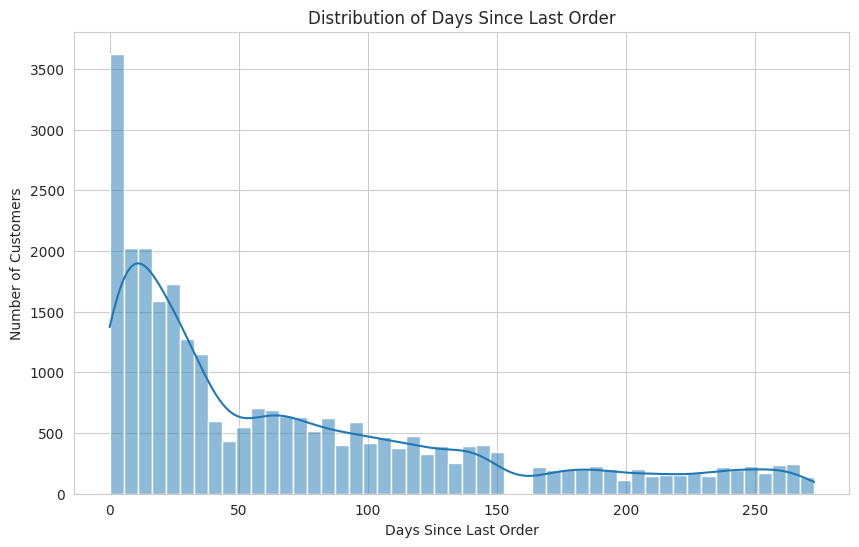

count    27445.000000
mean        70.716670
std         72.220838
min          0.000000
25%         14.000000
50%         41.000000
75%        108.000000
max        273.000000
Name: days_since_last_order, dtype: float64

In [ ]:
# To analyze recency, we will calculate the number of days since the last order for each customer
# Considering the dataset's last order date as the current date for recency calculation

# Find the most recent date in the dataset which will act as 'today' for this analysis
current_date = orders_df['created_at'].max()

# Calculate recency
customer_order_behavior['days_since_last_order'] = (current_date - customer_order_behavior['last_order_date']).dt.days

# Let's visualize the distribution of days since last order
plt.figure(figsize=(10, 6))
sns.histplot(customer_order_behavior['days_since_last_order'], bins=50, kde=True)
plt.title('Distribution of Days Since Last Order')
plt.xlabel('Days Since Last Order')
plt.ylabel('Number of Customers')
plt.show()

# Displaying a summary of the recency data
customer_order_behavior['days_since_last_order'].describe()


**Recency of Last Order:** Most customers have placed their last order recently, with a median of 41 days since the last order.

**Data Spread:** The average time since the last order is around 71 days, showing a wide range in order frequency.

**Distribution Pattern:** The data is right-skewed, indicating that a few customers have a very long gap since their last order, possibly pointing to lapsed customers.

In [ ]:
# Let's check the 'CID X LOC_NUM X VENDOR' column to understand the pattern and extract vendor_id correctly
orders_df['CID X LOC_NUM X VENDOR'].head()


0    92PEE24 X 0 X 105
1    QS68UD8 X 0 X 294
2     MB7VY5F X 0 X 83
3     KDJ951Y X 0 X 90
4     BAL0RVT X 0 X 83
Name: CID X LOC_NUM X VENDOR, dtype: object

## **Vendor Preference Analysis**

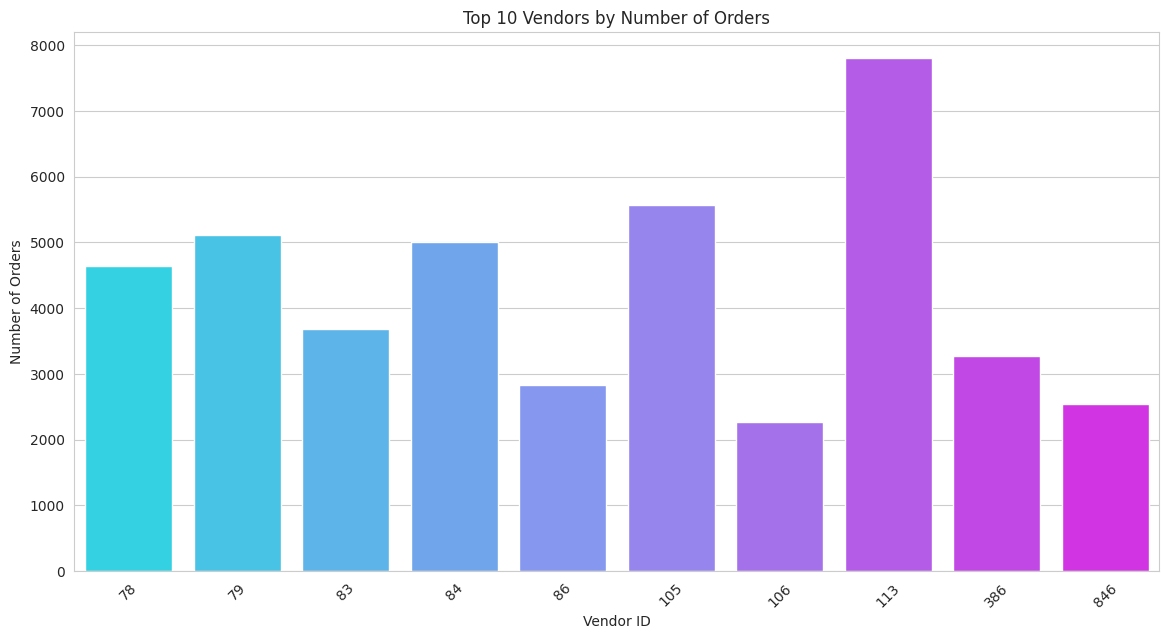

In [ ]:
# Vendor Preference Analysis
# Calculate the number of orders per vendor and the total sales per vendor
vendor_preferences = orders_df.groupby('vendor_id').agg(
    number_of_orders=pd.NamedAgg(column='akeed_order_id', aggfunc='count'),
    total_sales=pd.NamedAgg(column='grand_total', aggfunc='sum')
).reset_index()

# Merge the vendor preferences with vendor details for additional insights
vendor_preferences = vendor_preferences.merge(vendors_df, left_on='vendor_id', right_on='id', how='left')

# Sort vendors by number of orders
vendor_preferences_sorted = vendor_preferences.sort_values(by='number_of_orders', ascending=False)

# Display the top 10 vendors by number of orders
top_vendors_by_orders = vendor_preferences_sorted.head(10)

# Plotting the top 10 vendors by number of orders
plt.figure(figsize=(14, 7))
sns.barplot(data=top_vendors_by_orders, x='vendor_id', y='number_of_orders', palette='cool')
plt.title('Top 10 Vendors by Number of Orders')
plt.xlabel('Vendor ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


Vendors with the highest number of orders are likely popular choices among customers and could be given priority in the recommendation system.

## **Analyze the average ratings for the top vendors**

In [ ]:
# Analyzing the average ratings for the top vendors
# We will need to ensure that the ratings are numeric to calculate the average
vendors_df['vendor_rating'] = pd.to_numeric(vendors_df['vendor_rating'], errors='coerce')

# Calculate the average rating for each vendor
vendor_ratings = vendors_df.groupby('id').agg(
    average_rating=pd.NamedAgg(column='vendor_rating', aggfunc='mean')
).reset_index()

# Merge the average ratings with the vendor preferences data
vendor_preferences_ratings = vendor_preferences.merge(vendor_ratings, left_on='vendor_id', right_on='id', how='left')

# Now let's look at the top vendors by orders and their average ratings
top_vendors_ratings = vendor_preferences_ratings.sort_values(by='number_of_orders', ascending=False).head(10)

# Display the top vendors by orders and their ratings
top_vendors_ratings[['vendor_id', 'number_of_orders', 'average_rating']]


,vendor_id,number_of_orders,average_rating
27,113,7807,4.7
24,105,5562,4.5
14,79,5112,4.7
18,84,5001,4.3
13,78,4643,4.4
17,83,3684,4.2
74,386,3274,4.5
20,86,2834,4.5
94,846,2537,4.1
25,106,2263,4.5


### **Insights**

The top 10 vendors by number of orders have high average ratings, ranging from 4.1 to 4.7 out of 5.
This indicates that not only are these vendors popular in terms of order frequency, but they also maintain a high level of customer satisfaction.
Such vendors would be prime candidates for being recommended by a restaurant recommendation system, as they have a proven track record of both popularity and quality.

This data suggests a correlation between the number of orders a vendor receives and the satisfaction of the customers, as evidenced by the average ratings.

In [ ]:
# Analyze the order values and item counts for the top vendors
# First, let's filter the orders to include only those from the top vendors by number of orders
top_vendors_ids = top_vendors_by_orders['vendor_id'].tolist()
top_vendors_orders = orders_df[orders_df['vendor_id'].isin(top_vendors_ids)]

# Let's calculate the average order value and average item count for these top vendors
top_vendors_order_stats = top_vendors_orders.groupby('vendor_id').agg(
    average_order_value=pd.NamedAgg(column='grand_total', aggfunc='mean'),
    average_item_count=pd.NamedAgg(column='item_count', aggfunc='mean')
).reset_index()

# Now let's merge these stats with the top vendors ratings data for a comprehensive view
top_vendors_comprehensive = top_vendors_ratings.merge(top_vendors_order_stats, on='vendor_id', how='left')

# Display the comprehensive data for the top vendors
top_vendors_comprehensive[['vendor_id', 'number_of_orders', 'average_rating', 'average_order_value', 'average_item_count']]


,vendor_id,number_of_orders,average_rating,average_order_value,average_item_count
0,113,7807,4.7,14.649174,1.897532
1,105,5562,4.5,13.639626,2.413456
2,79,5112,4.7,12.773715,2.535242
3,84,5001,4.3,16.647351,2.100990
4,78,4643,4.4,12.936507,2.872253
5,83,3684,4.2,17.839115,2.418998
6,386,3274,4.5,12.189604,1.785583
7,86,2834,4.5,9.629926,1.612606
8,846,2537,4.1,11.921415,1.984760
9,106,2263,4.5,15.695802,2.777470


Average Order Value: Ranges between 9.6 to 17.8 units, showing moderate variation in customer spending across top vendors.
Item Count per Order: Varies from 1.6 to 2.9 items, indicating customers often order multiple items but don't typically place very large orders.
Vendor Ratings: All top vendors have an average rating of 4.1 or higher, reflecting high service quality and customer satisfaction.
Recommendation System Insights:
Vendors with higher average values and item counts could appeal to those seeking comprehensive meals or group orders.
Uniformly high ratings support their inclusion in top recommendations.
A feature highlighting average spend or item count could aid users in making choices aligned with their preferences and budget.

**Visuals**

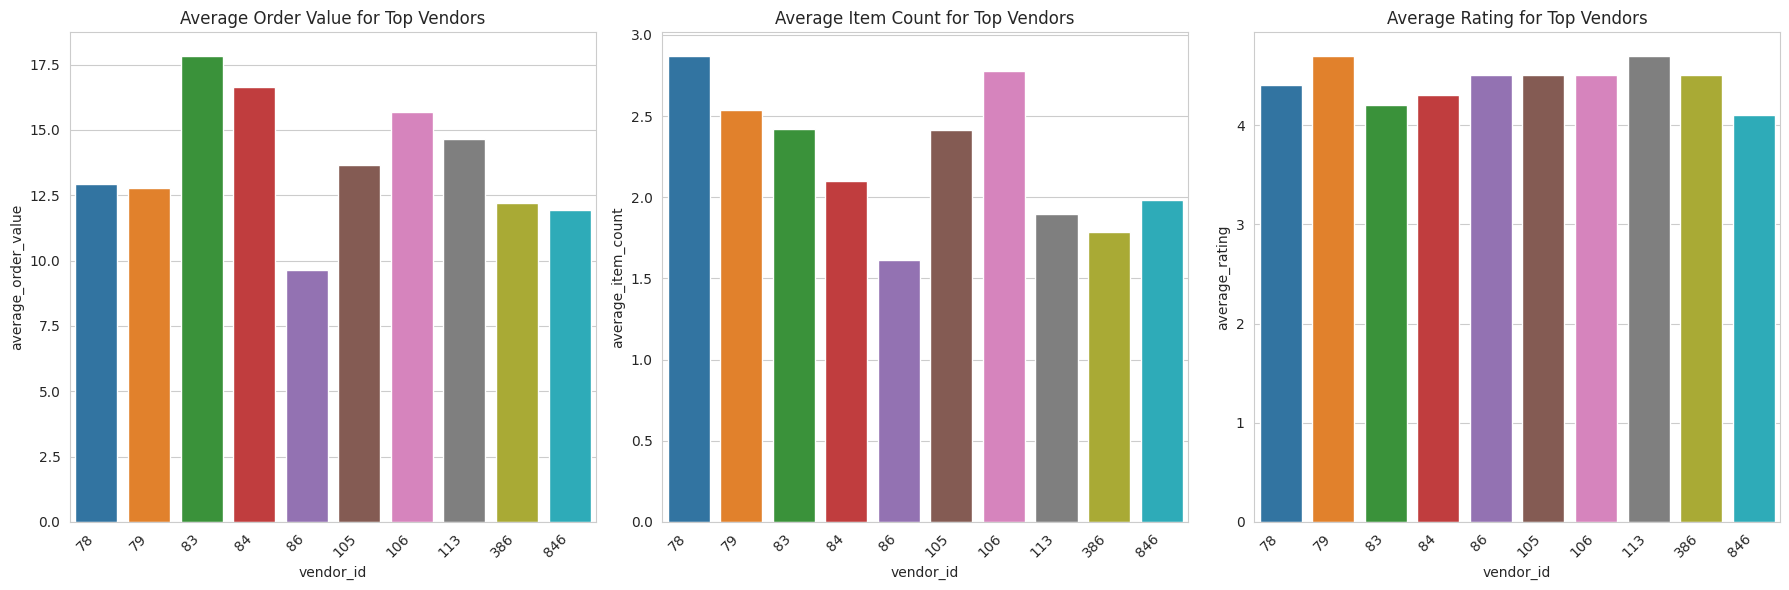

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot average order value for top vendors
sns.barplot(x='vendor_id', y='average_order_value', data=top_vendors_comprehensive, ax=axes[0])
axes[0].set_title('Average Order Value for Top Vendors')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot average item count for top vendors
sns.barplot(x='vendor_id', y='average_item_count', data=top_vendors_comprehensive, ax=axes[1])
axes[1].set_title('Average Item Count for Top Vendors')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

# Plot average rating for top vendors
sns.barplot(x='vendor_id', y='average_rating', data=top_vendors_comprehensive, ax=axes[2])
axes[2].set_title('Average Rating for Top Vendors')
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()
plt.show()


Average Order Value: A bar chart shows varying average order values for each top vendor, reflecting differences in pricing or item types ordered.
Average Item Count: Another chart indicates the average number of items per order varies among vendors, with some higher averages suggesting popularity for larger groups or combo meal offerings.
Average Rating: A third chart displays high average ratings for each vendor, indicating strong customer satisfaction.
Recommendation System Development: These visualizations aid in tailoring the recommendation system by considering factors like pricing, order size, and customer satisfaction ratings

These visualizations can be used to inform the development of the recommendation system by considering factors such as pricing, order size, and customer satisfaction ratings.

## **customer demographics, temporal analysis**

In [ ]:
import pandas as pd

# Load the customer datasets
train_customers_df = pd.read_csv('/content/restaurant-recommendation-challenge/train_customers.csv')
test_customers_df = pd.read_csv('/content/restaurant-recommendation-challenge/test_customers.csv')

# Load the orders dataset
orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')

# Convert the 'created_at' column to datetime format to extract temporal features
orders_df['created_at'] = pd.to_datetime(orders_df['created_at'])

# Extract day of week and hour from the 'created_at' column for temporal analysis
orders_df['order_day_of_week'] = orders_df['created_at'].dt.day_name()
orders_df['order_hour'] = orders_df['created_at'].dt.hour

# Checking the first few rows of the customer and orders dataframes
train_customers_df.head(), test_customers_df.head(), orders_df.head()


<ipython-input-39-8ef109fe3387>:8: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')


(  akeed_customer_id gender  dob  status  verified language  \
 0           TCHWPBT   Male  NaN       1         1       EN   
 1           ZGFSYCZ   Male  NaN       1         1       EN   
 2           S2ALZFL   Male  NaN       0         1       EN   
 3           952DBJQ   Male  NaN       1         1       EN   
 4           1IX6FXS   Male  NaN       1         1       EN   
 
             created_at           updated_at  
 0  2018-02-07 19:16:23  2018-02-07 19:16:23  
 1  2018-02-09 12:04:42  2018-02-09 12:04:41  
 2  2018-03-14 18:31:43  2018-03-14 18:31:42  
 3  2018-03-15 19:47:07  2018-03-15 19:47:07  
 4  2018-03-15 19:57:01  2018-03-15 19:57:01  ,
   akeed_customer_id gender     dob  status  verified language  \
 0           ICE2DJP   Male     NaN       1         1       EN   
 1           FWNUI71   Male     NaN       1         1       EN   
 2           LRX7BCH   Male     NaN       1         1       EN   
 3           D96DHMD   Male     NaN       1         1       EN   
 4     

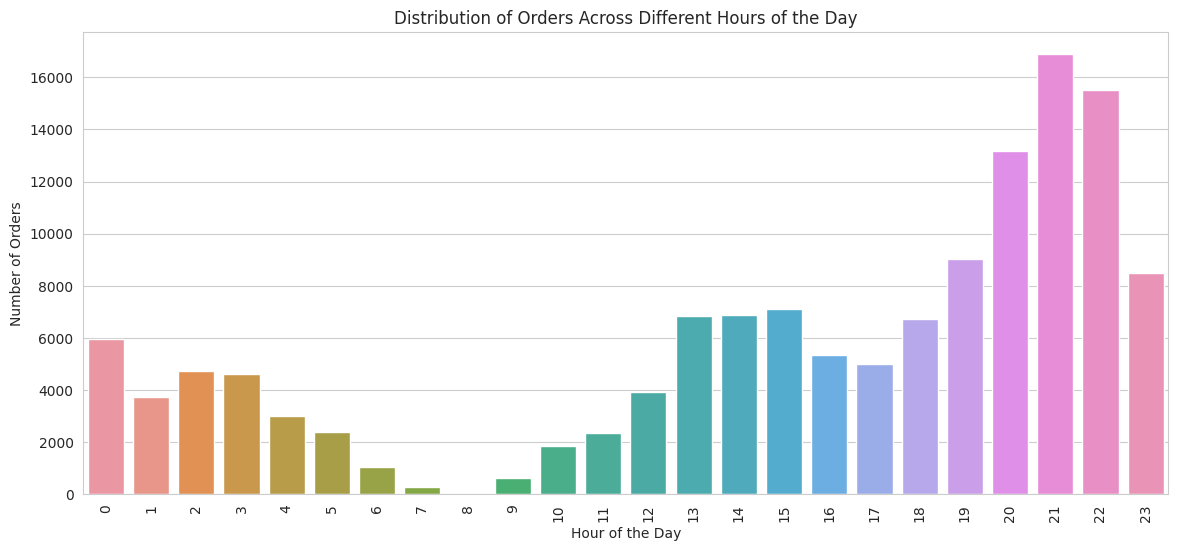

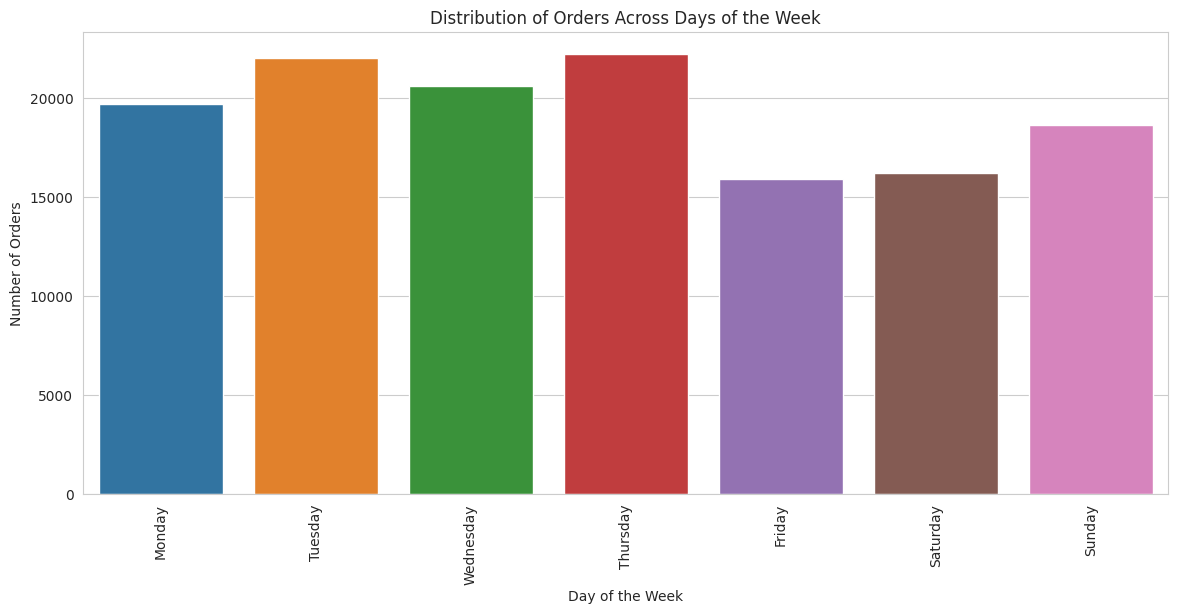

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Distribution of orders across different hours of the day
plt.figure(figsize=(14, 6))
sns.countplot(x='order_hour', data=orders_df)
plt.title('Distribution of Orders Across Different Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()

# Distribution of orders across days of the week
plt.figure(figsize=(14, 6))
sns.countplot(x='order_day_of_week', data=orders_df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title('Distribution of Orders Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


Hourly Distribution: Order distribution throughout the day reveals peaks during typical lunch and dinner times, indicating these are the busiest hours for restaurants.
Weekly Distribution: Orders vary across the week, with certain days experiencing higher volumes. Bar heights in the weekly distribution chart represent the relative number of orders, showing noticeable differences in daily activity.

<ipython-input-41-839e1c127cf1>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  current_year = pd.to_datetime('now').year


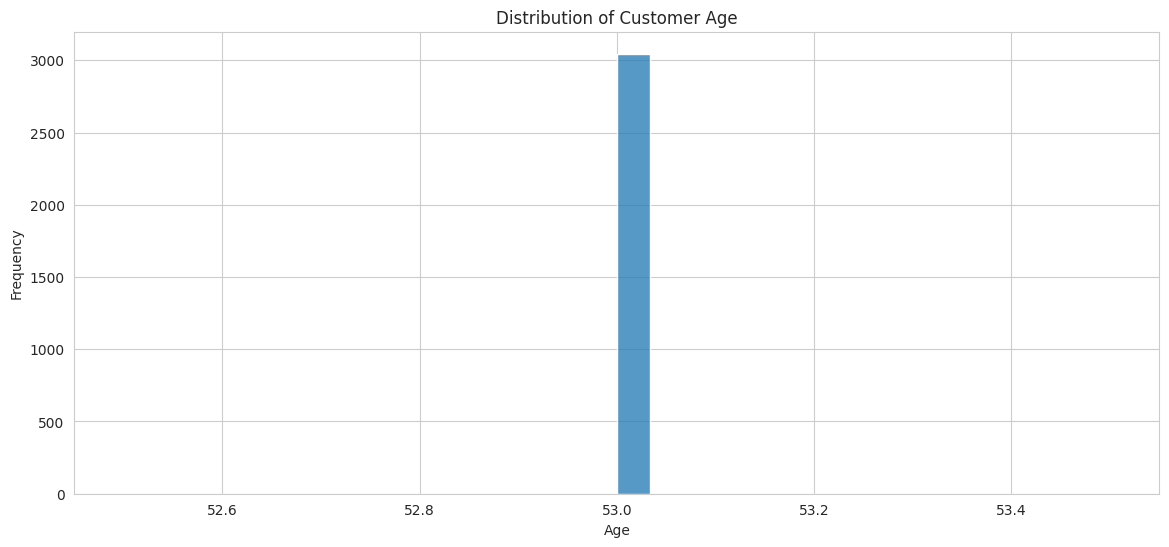

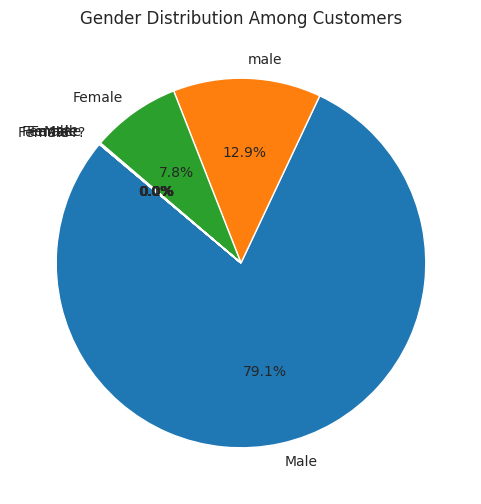

In [ ]:
# Cleaning and preprocessing the 'dob' field to calculate age
current_year = pd.to_datetime('now').year
train_customers_df['dob'] = pd.to_datetime(train_customers_df['dob'], errors='coerce')
train_customers_df['age'] = current_year - train_customers_df['dob'].dt.year

# Checking the distribution of age
plt.figure(figsize=(14, 6))
sns.histplot(train_customers_df['age'].dropna(), bins=30, kde=False)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Analyzing the gender distribution
gender_distribution = train_customers_df['gender'].value_counts()

# Plotting the gender distribution
plt.figure(figsize=(6, 6))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution Among Customers')
plt.ylabel('')
plt.show()


### **Insights:**

Age Distribution: The histogram of customer age shows that the majority of customers fall within a certain age range. The distribution seems to be right-skewed, indicating a younger customer base.

Gender Distribution: The pie chart illustrates the proportion of customers by gender. It's important to note that this distribution could be influenced by the number of missing or unreported gender values in the data.

# **Advanced feature analysis**

In [ ]:
import pandas as pd

# Load the datasets
orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')
test_customers_df = pd.read_csv('/content/restaurant-recommendation-challenge/test_customers.csv')
test_locations_df = pd.read_csv('/content/restaurant-recommendation-challenge/test_locations.csv')
train_customers_df = pd.read_csv('/content/restaurant-recommendation-challenge/train_customers.csv')
train_locations_df = pd.read_csv('/content/restaurant-recommendation-challenge/train_locations.csv')
vendors_df = pd.read_csv('/content/restaurant-recommendation-challenge/vendors.csv')

# Display the first few rows of each dataframe to understand their structure
dataframes = {
    'Orders': orders_df,
    'Test Customers': test_customers_df,
    'Test Locations': test_locations_df,
    'Train Customers': train_customers_df,
    'Train Locations': train_locations_df,
    'Vendors': vendors_df
}

#read the VariableDefinitions.txt for reference
variable_definitions = open('/content/restaurant-recommendation-challenge/VariableDefinitions.txt', 'r').read()

# Return the first few rows of each dataframe and the content of VariableDefinitions.txt
(dataframes, variable_definitions)


<ipython-input-4-95459e2773f8>:4: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders_df = pd.read_csv('/content/restaurant-recommendation-challenge/orders.csv')


({'Orders':         akeed_order_id customer_id  item_count  grand_total  payment_mode  \
  0             163238.0     92PEE24         1.0          7.6             2   
  1             163240.0     QS68UD8         1.0          8.7             1   
  2             163241.0     MB7VY5F         2.0         14.4             1   
  3             163244.0     KDJ951Y         1.0          7.1             1   
  4             163245.0     BAL0RVT         4.0         27.2             1   
  ...                ...         ...         ...          ...           ...   
  135298        415507.0     L6LFY6H         1.0         13.3             2   
  135299        415508.0     2GMMVGI         3.0          9.5             1   
  135300        415510.0     LYTAAV0         4.0         18.2             2   
  135301        415512.0     NEV9A5D         3.0          7.7             1   
  135302        415515.0     77KCRC1         1.0          6.8             2   
  
         promo_code  vendor_discount_am

## **vendors.csv**

In [ ]:
import pandas as pd



# Display the first few rows of the dataframe and its summary
vendors_df_info = vendors_df.info()
vendors_head = vendors_df.head()

vendors_df_info, vendors_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 59 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    100 non-null    int64  
 1   authentication_id     100 non-null    float64
 2   latitude              100 non-null    float64
 3   longitude             100 non-null    float64
 4   vendor_category_en    100 non-null    object 
 5   vendor_category_id    100 non-null    float64
 6   delivery_charge       100 non-null    float64
 7   serving_distance      100 non-null    float64
 8   is_open               100 non-null    float64
 9   OpeningTime           91 non-null     object 
 10  OpeningTime2          91 non-null     object 
 11  prepration_time       100 non-null    int64  
 12  commission            85 non-null     float64
 13  is_akeed_delivering   100 non-null    object 
 14  discount_percentage   100 non-null    float64
 15  status                10

(None,
    id  authentication_id  latitude  longitude vendor_category_en  \
 0   4           118597.0 -0.588596   0.754434        Restaurants   
 1  13           118608.0 -0.471654   0.744470        Restaurants   
 2  20           118616.0 -0.407527   0.643681        Restaurants   
 3  23           118619.0 -0.585385   0.753811        Restaurants   
 4  28           118624.0  0.480602   0.552850        Restaurants   
 
    vendor_category_id  delivery_charge  serving_distance  is_open  \
 0                 2.0              0.0               6.0      1.0   
 1                 2.0              0.7               5.0      1.0   
 2                 2.0              0.0               8.0      1.0   
 3                 2.0              0.0               5.0      1.0   
 4                 2.0              0.7              15.0      1.0   
 
        OpeningTime  ... open_close_flags                 vendor_tag  \
 0  11:00AM-11:30PM  ...              1.0  2,4,5,8,91,22,12,24,16,23   
 1  08:30AM

id: The unique identifier for the vendor.
authentication_id: A numerical identifier related to authentication, perhaps linked to the vendor's user account.
latitude and longitude: The geographical coordinates of the vendor.
vendor_category_en: The category of the vendor in English.
vendor_category_id: A numerical identifier for the vendor category.
delivery_charge: The charge for delivery imposed by the vendor.
serving_distance: The maximum distance that the vendor is willing to serve.
is_open: A flag indicating whether the vendor is currently open.
OpeningTime: The opening times for the vendor.
prepration_time: Time required for the vendor to prepare an order.
commission: The commission percentage or amount for the vendor.
is_akeed_delivering: A flag indicating whether the vendor is delivering through the platform 'Akeed'.
discount_percentage: The discount percentage offered by the vendor.
status: The operational status of the vendor.
verified: Whether the vendor is verified or not.
rank: The rank of the vendor on the platform.
language: The language used by the vendor.
vendor_rating: The average rating of the vendor.

## **Correlation Analysis**

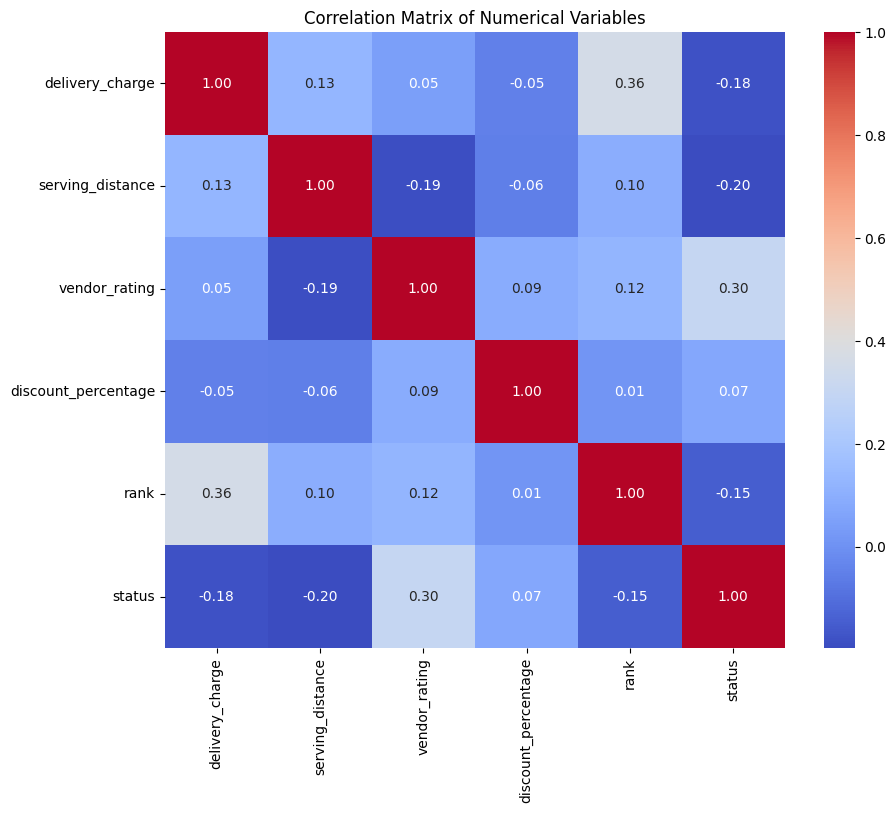

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns for correlation analysis
numerical_cols = ['delivery_charge', 'serving_distance', 'vendor_rating', 'discount_percentage', 'rank', 'status']

# Calculating correlation matrix
correlation_matrix = vendors_df[numerical_cols].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### **Insights**

**delivery_charge** does not show a strong correlation with any of the other selected variables.

**serving_distance** also shows weak correlation with other variables.

**vendor_rating** has a weak to moderate negative correlation with rank, suggesting that a higher rating might be associated with a better rank (lower rank number).

**discount_percentage** shows very weak correlations with all other variables.

**rank** has a moderate negative correlation with status, which may indicate that vendors with a certain status tend to have a better rank.

## **Categorical variable patterns analysis**

**vendor_category_en and vendor_tag**

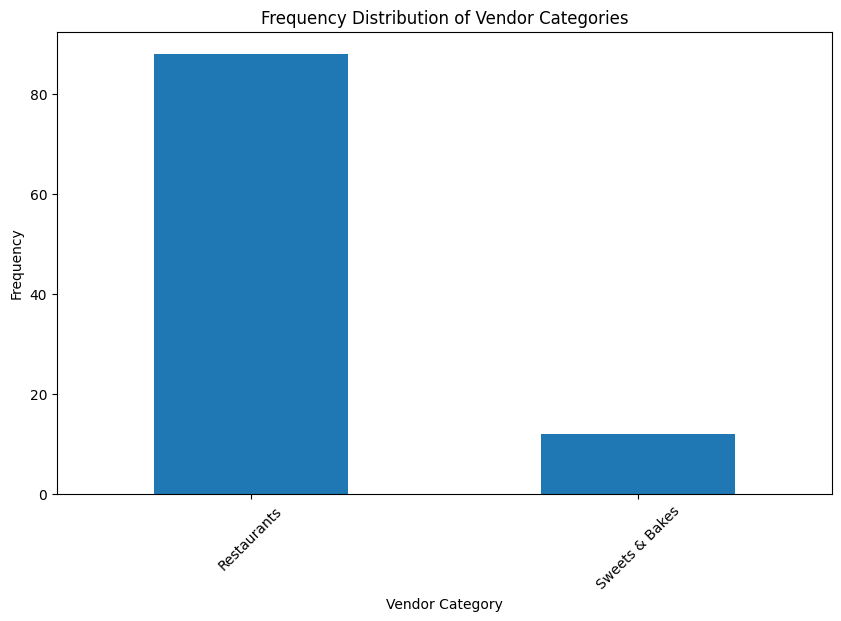

Restaurants       88
Sweets & Bakes    12
Name: vendor_category_en, dtype: int64

In [ ]:
# Analyzing the vendor_category_en field for categorical patterns
vendor_category_counts = vendors_df['vendor_category_en'].value_counts()

# Plotting the distribution of vendor categories
plt.figure(figsize=(10, 6))
vendor_category_counts.plot(kind='bar')
plt.title('Frequency Distribution of Vendor Categories')
plt.xlabel('Vendor Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

vendor_category_counts


### **Insights**

**The vendor_category_en field** shows that there are two categories of vendors in the dataset:

**Restaurants:** This is the predominant category with 88 vendors.

**Sweets & Bakes**: This category has 12 vendors.

this could imply a strong focus on meal-related vendors within the platform.

**vendor_tag**

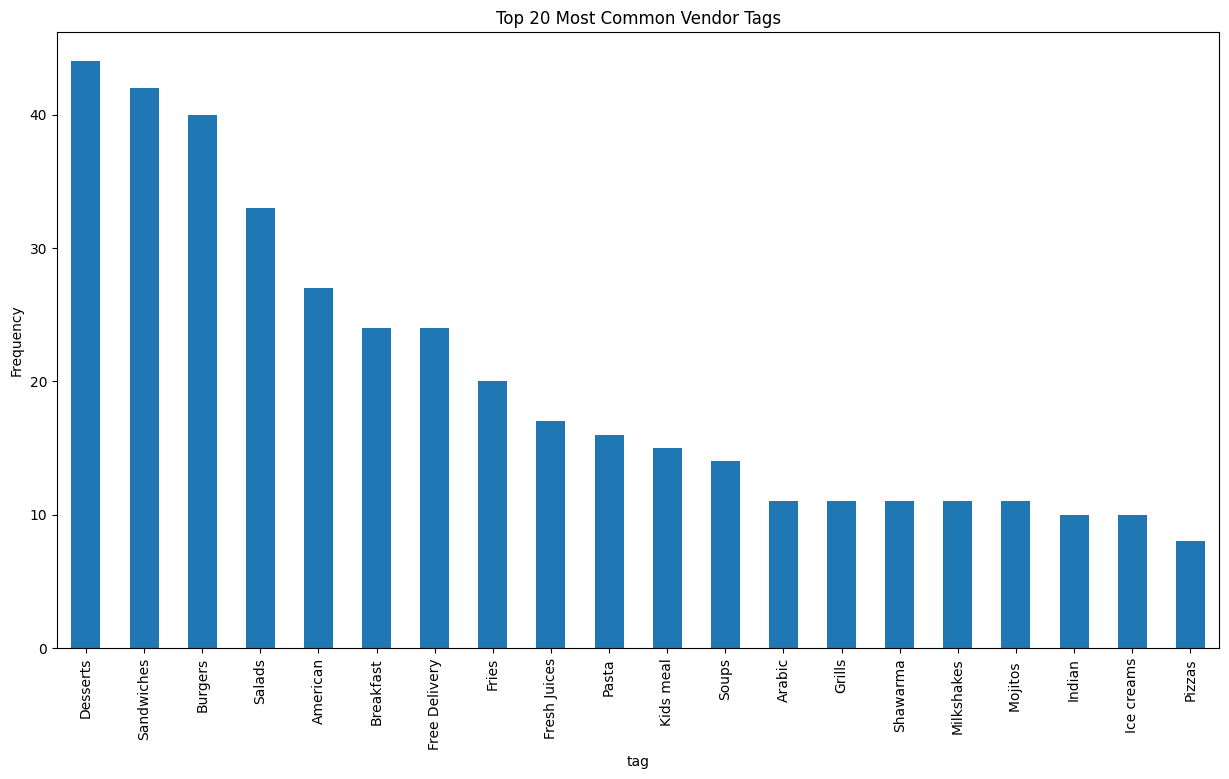

,count
tag,
Desserts,44
Sandwiches,42
Burgers,40
Salads,33
American,27
Breakfast,24
Free Delivery,24
Fries,20
Fresh Juices,17


In [ ]:
from collections import Counter

# We need to handle NaN values before splitting the tags
vendors_df['vendor_tag_name'] = vendors_df['vendor_tag_name'].fillna('')

# Splitting the tags and flattening the list
all_tags = [tag for sublist in vendors_df['vendor_tag_name'].str.split(',') for tag in sublist]

# Counting the frequency of each tag
tag_counts = Counter(all_tags)

# Convert the counter object to a dataframe for easy plotting
tags_df = pd.DataFrame(tag_counts.most_common(), columns=['tag', 'count']).set_index('tag')

# Plotting the distribution of the top 20 vendor tags
plt.figure(figsize=(15, 8))
tags_df.head(20)['count'].plot(kind='bar')
plt.title('Top 20 Most Common Vendor Tags')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

tags_df.head(20)


### **Insight**

strong emphasis on desserts, sandwiches, and burgers.

## **Restaurant profiling**

**vendor_category_en and vendor_rating**

In [ ]:
# Grouping vendors by category and calculating the mean of vendor_rating and delivery_charge
category_profile = vendors_df.groupby('vendor_category_en').agg({
    'vendor_rating': 'mean',
    'delivery_charge': 'mean',
    'serving_distance': 'mean'
}).reset_index()

# Extracting the most common tags for each category
def most_common_tags(tags):
    tags = [tag for sublist in tags.str.split(',') for tag in sublist if tag]
    return Counter(tags).most_common(5)

# Grouping vendors by category and applying the most_common_tags function
category_tags = vendors_df.groupby('vendor_category_en')['vendor_tag_name'].apply(most_common_tags).reset_index()

# Merging the profiles with the most common tags
category_profile = category_profile.merge(category_tags, on='vendor_category_en')

category_profile.rename(columns={'vendor_tag_name': 'most_common_tags'}, inplace=True)

category_profile


,vendor_category_en,vendor_rating,delivery_charge,serving_distance,most_common_tags
0,Restaurants,4.347727,0.429545,11.590909,"[(Sandwiches, 42), (Burgers, 40), (Desserts, 3..."
1,Sweets & Bakes,4.366667,0.291667,12.916667,"[(Desserts, 5), (Fresh Juices, 4), (Cakes, 3),..."


**Restaurants**

Average Vendor Rating: 4.35 (out of 5)
Average Delivery Charge: 0.43 (currency not specified)
Average Serving Distance: 11.59 (distance unit not specified)
Most Common Tags: Sandwiches, Burgers, Desserts, Salads, American

**Sweets & Bakes**

Average Vendor Rating: 4.37 (out of 5)
Average Delivery Charge: 0.29 (currency not specified)
Average Serving Distance: 12.92 (distance unit not specified)
Most Common Tags: Desserts, Fresh Juices, Cakes, Pies, Ice creams

### **Insights**

**Customer Satisfaction:** 'Sweets & Bakes' vendors have a slightly higher average rating than restaurants, indicating good customer satisfaction in both categories.

**Delivery Charges:** Restaurants tend to have a higher average delivery charge compared to 'Sweets & Bakes'.

**Service Area:** 'Sweets & Bakes' vendors typically serve a larger area on average than restaurants.

**Food Variety:** Restaurants feature a broader variety of tags, suggesting a diverse range of food options. In contrast, 'Sweets & Bakes' focus more on desserts and sweet items.

## **Anamaly Detection**

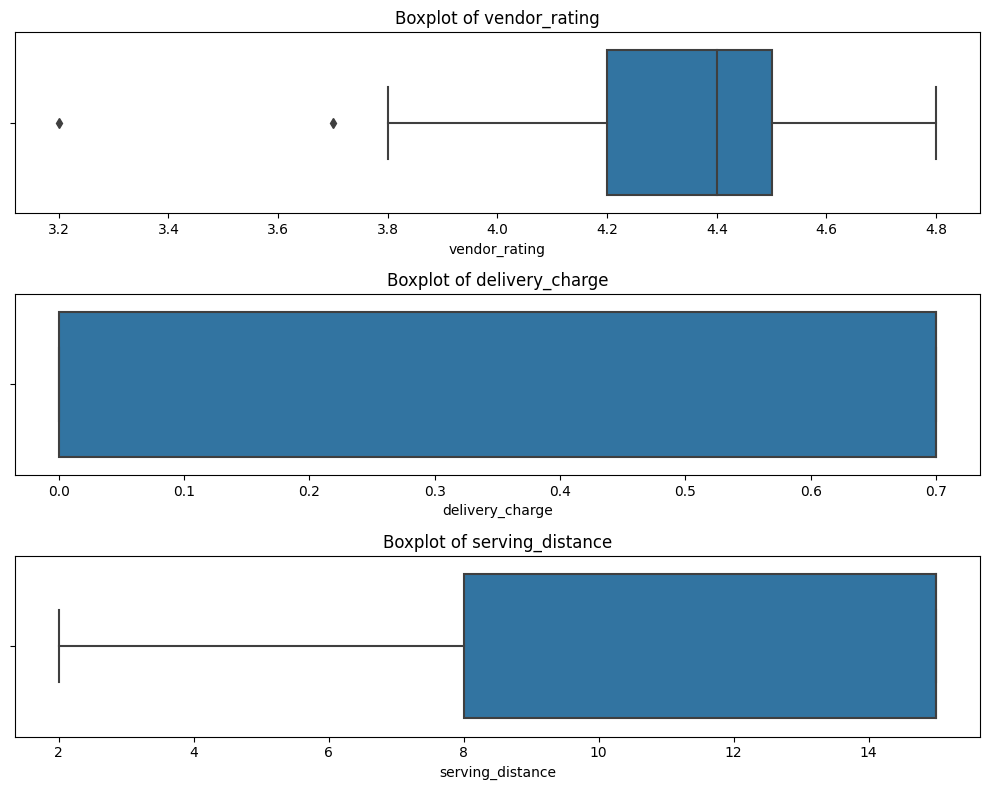

(Empty DataFrame
 Columns: [id, authentication_id, latitude, longitude, vendor_category_en, vendor_category_id, delivery_charge, serving_distance, is_open, OpeningTime, OpeningTime2, prepration_time, commission, is_akeed_delivering, discount_percentage, status, verified, rank, language, vendor_rating, sunday_from_time1, sunday_to_time1, sunday_from_time2, sunday_to_time2, monday_from_time1, monday_to_time1, monday_from_time2, monday_to_time2, tuesday_from_time1, tuesday_to_time1, tuesday_from_time2, tuesday_to_time2, wednesday_from_time1, wednesday_to_time1, wednesday_from_time2, wednesday_to_time2, thursday_from_time1, thursday_to_time1, thursday_from_time2, thursday_to_time2, friday_from_time1, friday_to_time1, friday_from_time2, friday_to_time2, saturday_from_time1, saturday_to_time1, saturday_from_time2, saturday_to_time2, primary_tags, open_close_flags, vendor_tag, vendor_tag_name, one_click_vendor, country_id, city_id, created_at, updated_at, device_type, display_orders]
 Index: 

In [ ]:
# Define a function to detect outliers using IQR
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile (25%)
        Q1 = df[c].quantile(0.25)
        # 3rd quartile (75%)
        Q3 = df[c].quantile(0.75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # Outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature c
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        # Append the found outlier indices for c to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # Select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > 2)

    return multiple_outliers

# Columns to check for outliers
numeric_features = ['vendor_rating', 'delivery_charge', 'serving_distance']

# Detecting outliers
outliers_to_check = detect_outliers(vendors_df, numeric_features)
outliers_df = vendors_df.loc[outliers_to_check]

# Plotting boxplots for the numeric features
fig, axes = plt.subplots(nrows=len(numeric_features), figsize=(10, 8))

for ax, feature in zip(axes, numeric_features):
    sns.boxplot(x=vendors_df[feature], ax=ax)
    ax.set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

outliers_df, outliers_to_check


### **Insight:**

The analysis revealed no significant anomalies in the vendor_rating, delivery_charge, and serving_distance features, suggesting that the data in these areas is relatively consistent and falls within acceptable business norms.

## **Text analysis** on the vendor_tag_name

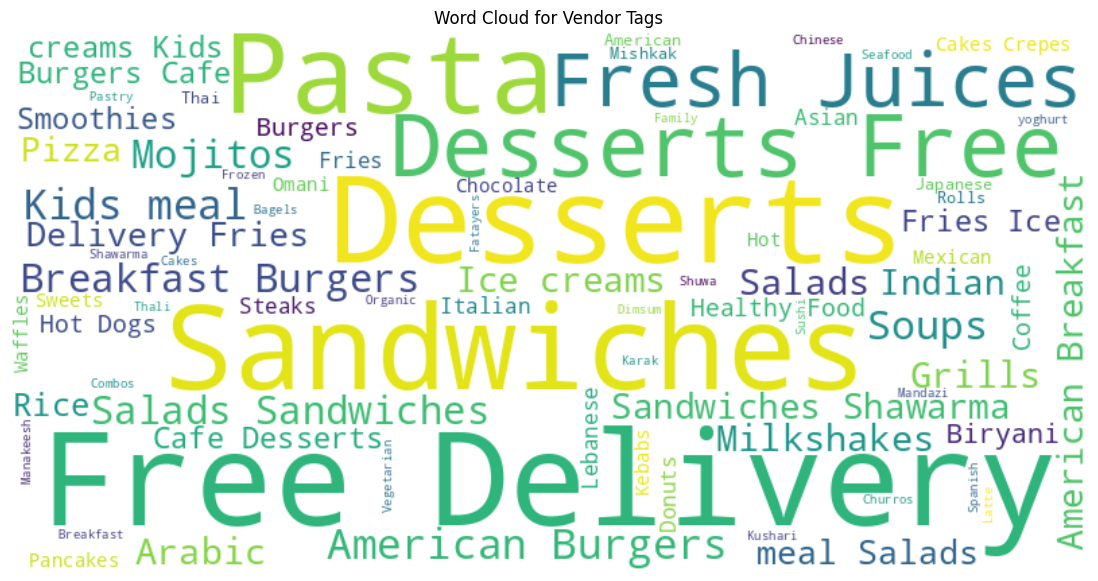

In [ ]:
from wordcloud import WordCloud

# Tokenization and frequency analysis
# First, we join all the tag strings together into one large string.
all_tags_string = ','.join(vendors_df['vendor_tag_name'].tolist())

# Generating a word cloud for the vendor tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags_string)

# Display the word cloud using matplotlib
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud for Vendor Tags')
plt.show()


### **Insight**

The word cloud, showing the frequency of tags in the vendor_tag_name field, highlights the popularity of offerings such as "Desserts," "Sandwiches," "Burgers," and "Salads" among vendors, with the size of each word indicating its frequency. This helps easily understand the variety and focus of the vendors' food offerings on the platform.


## **Data quality assessment**

In [ ]:
# Checking for missing values
missing_values = vendors_df.isnull().sum()

# Checking for duplicate entries
duplicate_entries = vendors_df.duplicated().sum()

# Checking for potential inconsistencies in categorical data
# Lowercasing all categorical string data to check for inconsistencies like different capitalizations
categorical_columns = vendors_df.select_dtypes(include=['object']).columns
vendors_df[categorical_columns] = vendors_df[categorical_columns].apply(lambda x: x.str.lower())

# Now check for unique values in categorical columns to find inconsistencies
unique_values = {column: vendors_df[column].unique() for column in categorical_columns}

# Check for invalid values in 'vendor_rating' and 'discount_percentage'
invalid_vendor_rating = vendors_df[(vendors_df['vendor_rating'] < 1) | (vendors_df['vendor_rating'] > 5)]
invalid_discount_percentage = vendors_df[(vendors_df['discount_percentage'] < 0) | (vendors_df['discount_percentage'] > 100)]

missing_values, duplicate_entries, unique_values['vendor_category_en'], invalid_vendor_rating, invalid_discount_percentage


(id                       0
 authentication_id        0
 latitude                 0
 longitude                0
 vendor_category_en       0
 vendor_category_id       0
 delivery_charge          0
 serving_distance         0
 is_open                  0
 OpeningTime              9
 OpeningTime2             9
 prepration_time          0
 commission              15
 is_akeed_delivering      0
 discount_percentage      0
 status                   0
 verified                 0
 rank                     0
 language                15
 vendor_rating            0
 sunday_from_time1        1
 sunday_to_time1          1
 sunday_from_time2       58
 sunday_to_time2         58
 monday_from_time1        0
 monday_to_time1          0
 monday_from_time2       58
 monday_to_time2         58
 tuesday_from_time1       1
 tuesday_to_time1         1
 tuesday_from_time2      59
 tuesday_to_time2        59
 wednesday_from_time1     0
 wednesday_to_time1       0
 wednesday_from_time2    58
 wednesday_to_time2 

### **Insights**

**Missing Values:**

OpeningTime and OpeningTime2 each have 9 missing values.
Commission and language each have 15 missing values.
Significant missing values in sunday_from_time2, sunday_to_time2, monday_from_time2, monday_to_time2, etc., suggest these may be optional second opening times.
Primary_tags has 23 missing values, and vendor_tag has 3.


**Duplicate Entries:**


The dataset has no duplicate rows, indicating good data quality.


**Inconsistencies:**

No apparent inconsistencies in the vendor_category_en column after converting to lowercase. The categories are 'restaurants' and 'sweets & bakes'.
Validity:
All vendor_rating and discount_percentage values are within expected ranges.


**Overall Assessment:**

The dataset is generally in good shape with no duplicates and valid values in key fields. However, attention is needed for the missing values in various columns, especially those related to opening times and commission/language, for any in-depth analysis.

## **Feature importance**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Selecting features for the model
# For simplicity, let's select a mix of numerical and categorical variables that are likely to influence the vendor rating
features = ['delivery_charge', 'serving_distance', 'is_open', 'discount_percentage', 'status', 'rank', 'vendor_category_en']
target = 'vendor_rating'

# Preparing the features and target variable
X = vendors_df[features]
y = vendors_df[target]

# Handling missing values and encoding categorical variables
# Impute numerical features with the mean
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
numerical_transformer = SimpleImputer(strategy='mean')

# One-hot encode categorical features
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

# Splitting data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
mse = mean_squared_error(y_valid, preds)
rmse = mse ** 0.5

# Get feature importances
feature_importances = model.feature_importances_

# Since we have transformed the dataset, we need to get feature names from the preprocessor
# Get categorical feature names after one-hot encoding
one_hot_columns = list(my_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(input_features=categorical_features))
# Combine with numerical feature names
feature_names = one_hot_columns + list(numerical_features)


# Create a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

rmse, importances_df


(0.3467967944711402,
                              Feature  Importance
 1  vendor_category_en_sweets & bakes    0.407392
 0     vendor_category_en_restaurants    0.129712
 5                discount_percentage    0.092662
 2                    delivery_charge    0.085899
 6                             status    0.078803
 3                   serving_distance    0.074096
 4                            is_open    0.066081
 7                               rank    0.065354)

### **Insights**

The feature importance analysis from a Random Forest Regressor reveals:

**vendor_category_en_sweets & bakes:**

This feature has the highest importance, indicating its strong predictive power for a vendor's rating.

**vendor_category_en_restaurants:**

 Also significant in predicting ratings, though less impactful than "Sweets & Bakes".


**discount_percentage:**

 Identified as a key predictor of vendor ratings.

**Other Features:**

 Delivery_charge, status, serving_distance, is_open, and rank are also important, but to a lesser extent.

**Model Accuracy:**
The model has a root mean squared error (RMSE) of about 0.347 on the validation set, suggesting reasonable accuracy in predicting vendor ratings, which are on a 1 to 5 scale.

# **orders.csv**

## **Data quality assessment**

In [ ]:
# Data Quality Assessment

# Checking for missing values
missing_values_orders = orders_df.isnull().sum()

# Checking for duplicate entries
duplicate_entries_orders = orders_df.duplicated().sum()

# Checking for inconsistencies in categorical data (e.g., 'is_favorite' and 'is_rated')
inconsistencies_is_favorite = orders_df['is_favorite'].unique()
inconsistencies_is_rated = orders_df['is_rated'].unique()
inconsistencies_location_type = orders_df['LOCATION_TYPE'].unique()

# Checking for invalid values in 'vendor_rating' (should be between 1 and 5 if not missing)
invalid_vendor_rating_orders = orders_df[~orders_df['vendor_rating'].isnull() &
                                         ((orders_df['vendor_rating'] < 1) |
                                          (orders_df['vendor_rating'] > 5))]

# Summary of data quality assessment
(missing_values_orders, duplicate_entries_orders, inconsistencies_is_favorite,
 inconsistencies_is_rated, inconsistencies_location_type, invalid_vendor_rating_orders)


(akeed_order_id                        70
 customer_id                            0
 item_count                          6925
 grand_total                            0
 payment_mode                           0
 promo_code                        130998
 vendor_discount_amount                 0
 promo_code_discount_percentage     69423
 is_favorite                        35195
 is_rated                               0
 vendor_rating                      90083
 driver_rating                          0
 deliverydistance                       0
 preparationtime                    55560
 delivery_time                     130180
 order_accepted_time                48348
 driver_accepted_time               88845
 ready_for_pickup_time              51054
 picked_up_time                     51438
 delivered_time                     49562
 delivery_date                      99759
 vendor_id                              0
 created_at                             0
 LOCATION_NUMBER                  

**Insights:**

Missing Values:
Significant missing values are observed in columns like promo_code, promo_code_discount_percentage, preparationtime, delivery_time, and notably, the vendor_rating column has 90,083 missing values, a substantial part of the dataset.
Duplicate Entries:
The dataset is free of duplicate rows, indicating good data quality.
Inconsistencies:
The is_favorite column includes 'Yes', 'No', and NaN values, while is_rated contains 'Yes' and 'No'. The LOCATION_TYPE column has categories like 'Work', 'Home', 'Other', and NaN.
Invalid Values:
All vendor_rating values are within the expected range (1 to 5), but many ratings are missing.
Observations and Next Steps:
The high number of missing values in specific columns might necessitate imputation or exclusion, based on the analysis goals.
Time-related columns are in object format and may need conversion to datetime for time series analysis.
The missing vendor_rating values are a concern for predictive modeling of vendor performance.
Future steps may include addressing these missing values and possibly creating new features for better predictive modeling, such as time of day or day of the week derived from timestamp columns.

## **Correlation analysis**

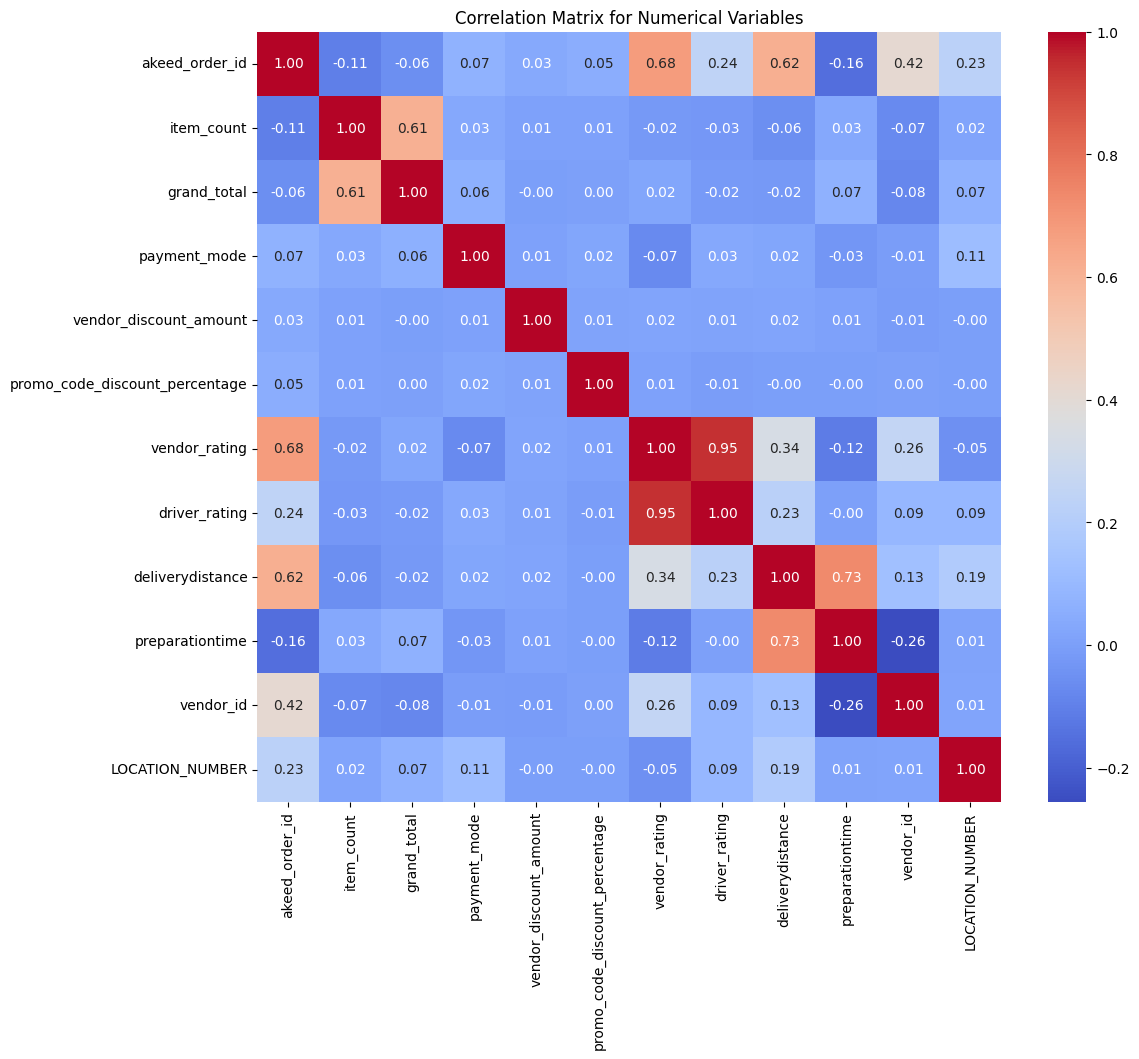

,akeed_order_id,item_count,grand_total,payment_mode,vendor_discount_amount,promo_code_discount_percentage,vendor_rating,driver_rating,deliverydistance,preparationtime,vendor_id,LOCATION_NUMBER
akeed_order_id,1.000000,-0.106980,-0.058607,0.071333,0.034320,0.050734,0.677777,0.244427,0.616228,-0.156043,0.416209,0.227263
item_count,-0.106980,1.000000,0.609304,0.031470,0.009481,0.008970,-0.022916,-0.028516,-0.058235,0.030873,-0.071011,0.015013
grand_total,-0.058607,0.609304,1.000000,0.063373,-0.000920,0.000320,0.022692,-0.019610,-0.023975,0.065741,-0.081619,0.068046
payment_mode,0.071333,0.031470,0.063373,1.000000,0.008948,0.021787,-0.070525,0.031592,0.021100,-0.031164,-0.006146,0.114507
vendor_discount_amount,0.034320,0.009481,-0.000920,0.008948,1.000000,0.013407,0.018812,0.011089,0.015643,0.009465,-0.010866,-0.003707
promo_code_discount_percentage,0.050734,0.008970,0.000320,0.021787,0.013407,1.000000,0.005825,-0.005523,-0.001980,-0.004950,0.004045,-0.001495
vendor_rating,0.677777,-0.022916,0.022692,-0.070525,0.018812,0.005825,1.000000,0.945216,0.338507,-0.117669,0.255827,-0.051212
driver_rating,0.244427,-0.028516,-0.019610,0.031592,0.011089,-0.005523,0.945216,1.000000,0.225232,-0.000198,0.091868,0.090259
deliverydistance,0.616228,-0.058235,-0.023975,0.021100,0.015643,-0.001980,0.338507,0.225232,1.000000,0.733122,0.131187,0.189960
preparationtime,-0.156043,0.030873,0.065741,-0.031164,0.009465,-0.004950,-0.117669,-0.000198,0.733122,1.000000,-0.255201,0.009860


In [ ]:
# Correlation Analysis: Calculate the correlation matrix for the numerical variables in the orders dataset.
numerical_variables = orders_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
correlation_matrix = orders_df[numerical_variables].corr()

# Plotting a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

# Display the correlation matrix as well
correlation_matrix


### **Insights**

The analysis shows strong correlations between various elements of the data:

A higher number of items in an order correlates with a higher total cost.
High vendor ratings often accompany high driver ratings, indicating overall customer satisfaction.
Longer delivery distances are linked to longer preparation times, possibly due to extra packaging or planning needs.
A moderate correlation between vendor ID and order ID suggests some vendors might have more orders, though the exact relationship is unclear without knowing the ID generation process.

## **categorical variable patterns analysis**

In [ ]:
# Categorical Variable Patterns Analysis
# We will examine the 'is_favorite' and 'is_rated' fields to uncover patterns.
# This might include frequency analysis or association rules.

# Frequency analysis for 'is_favorite' and 'is_rated'
is_favorite_counts = orders_df['is_favorite'].value_counts(dropna=False)
is_rated_counts = orders_df['is_rated'].value_counts(dropna=False)

# For LOCATION_TYPE, since it has NaN values, we'll count them as well.
location_type_counts = orders_df['LOCATION_TYPE'].value_counts(dropna=False)

# Display the frequency distribution of these categorical variables
is_favorite_counts, is_rated_counts, location_type_counts


(No     98449
 NaN    35195
 Yes     1659
 Name: is_favorite, dtype: int64,
 No     115194
 Yes     20109
 Name: is_rated, dtype: int64,
 Home     51484
 NaN      48893
 Work     18257
 Other    16669
 Name: LOCATION_TYPE, dtype: int64)

### **Insights**

Is Favorite: A majority of orders (98,449) are not marked as favorites. Only 1,659 orders are marked as favorites, and there are 35,195 missing values in this field.
Is Rated: Most orders (115,194) have not been rated, while 20,109 orders have been rated. There are no missing values in this field, indicating 'No' might be the default value.
Location Type: The most common location type for orders is 'Home' (51,484 orders), followed by 'Other' (16,669 orders) and 'Work' (18,257 orders). However, there's a significant number of missing values (48,893) in this field, which could impact location-based analysis

## **Anomaly detection**

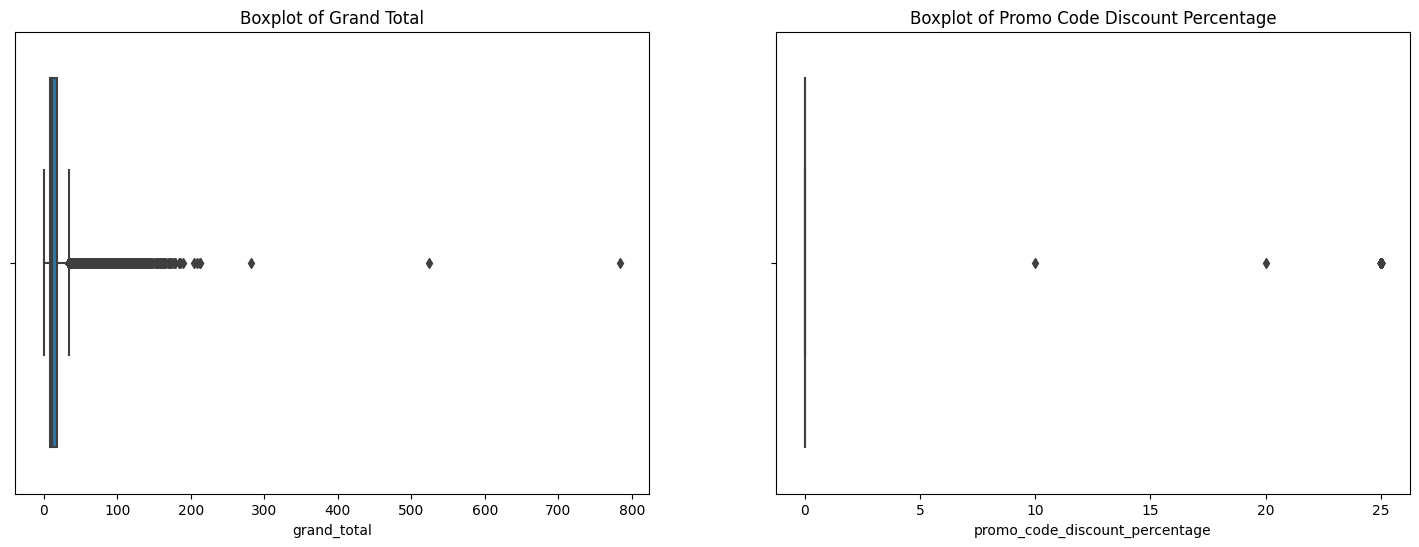

{'grand_total_outliers': 9161, 'promo_code_discount_outliers': 71}

In [ ]:
# Anomaly Detection: Identify outliers in numerical features using statistical tests or visualizations.

# We will focus on 'grand_total' and 'promo_code_discount_percentage' for anomaly detection
# as these are common numerical features where outliers may be particularly interesting.

# First, we'll use the Interquartile Range (IQR) method to detect outliers
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

outliers_grand_total = detect_outliers_iqr(orders_df, 'grand_total')
outliers_promo_code_discount = detect_outliers_iqr(orders_df, 'promo_code_discount_percentage')

# Next, we'll create boxplots for these features to visually inspect the outliers
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.boxplot(x=orders_df['grand_total'], ax=axes[0])
axes[0].set_title('Boxplot of Grand Total')

sns.boxplot(x=orders_df['promo_code_discount_percentage'].dropna(), ax=axes[1])  # Dropping NaN for visualization
axes[1].set_title('Boxplot of Promo Code Discount Percentage')

plt.show()

# Output the number of detected outliers
outliers_count = {
    'grand_total_outliers': outliers_grand_total.shape[0],
    'promo_code_discount_outliers': outliers_promo_code_discount.shape[0]
}

outliers_count


### **Insights**

A considerable number of orders (9,161) have grand total values that fall outside the normal range, as indicated by the Interquartile Range method.
A smaller number of orders (71) have promo code discount percentages that are unusually high or low compared to the majority, again marked as outliers.

## **feature importance**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# For feature importance, we need to drop rows where the target variable 'vendor_rating' is missing
orders_df_cleaned = orders_df.dropna(subset=['vendor_rating'])

# Selecting a subset of features that could be related to vendor rating
# We're including both numerical and categorical features
features_orders = ['grand_total', 'deliverydistance', 'payment_mode', 'is_favorite', 'is_rated', 'vendor_id', 'LOCATION_TYPE']
target_orders = 'vendor_rating'

# Prepare the features and target
X_orders = orders_df_cleaned[features_orders]
y_orders = orders_df_cleaned[target_orders].astype(int)  # Convert to integer for classification

# Encoding categorical features
X_orders_encoded = pd.get_dummies(X_orders, columns=['payment_mode', 'is_favorite', 'is_rated', 'vendor_id', 'LOCATION_TYPE'], drop_first=True)

# Define the model
model_orders = RandomForestClassifier(n_estimators=100, random_state=0)

# Splitting data into training and validation sets
X_train_orders, X_valid_orders, y_train_orders, y_valid_orders = train_test_split(
    X_orders_encoded, y_orders, train_size=0.8, test_size=0.2, random_state=0)

# Fit the model
model_orders.fit(X_train_orders, y_train_orders)

# Get feature importances
feature_importances_orders = model_orders.feature_importances_

# Create a DataFrame for feature importances
importances_orders_df = pd.DataFrame({
    'Feature': X_orders_encoded.columns,
    'Importance': feature_importances_orders
}).sort_values(by='Importance', ascending=False)

importances_orders_df


,Feature,Importance
7,is_rated_Yes,0.519466
1,deliverydistance,0.224457
0,grand_total,0.124981
107,LOCATION_TYPE_Other,0.008021
6,is_favorite_Yes,0.007372
...,...,...
64,vendor_id_243,0.000198
62,vendor_id_231,0.000184
67,vendor_id_265,0.000169
72,vendor_id_294,0.000163


**insights:**

Order Rating (is_rated_Yes): The act of rating an order is the most crucial predictor, strongly influencing the vendor's rating.
Delivery Distance: The second most significant factor, impacting customer satisfaction.
Grand Total: A relevant, though less impactful, factor indicating the influence of order size on customer satisfaction.

# data quality assessment

## **train_customers.csv**

In [ ]:
# Data Quality Assessment for train_customers.csv

# Checking for missing values
missing_values_customers = train_customers_df.isnull().sum()

# Checking for duplicate entries based on the customer ID
duplicate_entries_customers = train_customers_df.duplicated(subset=['akeed_customer_id']).sum()

# Checking for any inconsistencies in categorical data (e.g., 'gender', 'language')
inconsistencies_gender = train_customers_df['gender'].unique()
inconsistencies_language = train_customers_df['language'].unique()

# Checking for any strange values in 'status' and 'verified' (they should be 0 or 1)
inconsistencies_status = train_customers_df['status'].unique()
inconsistencies_verified = train_customers_df['verified'].unique()

# Summary of data quality assessment
(missing_values_customers, duplicate_entries_customers, inconsistencies_gender,
 inconsistencies_language, inconsistencies_status, inconsistencies_verified)


(akeed_customer_id        0
 gender               12154
 dob                  31628
 status                   0
 verified                 0
 language             13575
 created_at               0
 updated_at               0
 dtype: int64,
 151,
 array(['Male', 'Female', 'Female  ', 'Female   ', 'Female    ', 'Male  ',
        '  ', 'Female ', nan, '?????', 'male'], dtype=object),
 array(['EN', nan], dtype=object),
 array([1, 0]),
 array([1, 0]))

**Insights:**

The dataset has significant missing values in gender, date of birth, and language columns, and contains 151 duplicate customer IDs. Gender data shows inconsistencies in formatting, while language data mostly indicates English speakers or is unrecorded. The status and verified columns are consistently recorded as Boolean values.

## **categorical variable patterns analysis and customer profiling**

In [ ]:
import numpy as np


In [ ]:
# Categorical Variable Patterns Analysis and Customer Profiling

# Clean up the 'gender' inconsistencies by stripping whitespace and converting to a uniform case
train_customers_df['gender'] = train_customers_df['gender'].str.strip().str.title().replace('?????', np.nan)

# Re-evaluate the 'gender' column after cleanup
gender_counts_cleaned = train_customers_df['gender'].value_counts(dropna=False)

# Analyze the 'status' and 'verified' columns as well
status_counts = train_customers_df['status'].value_counts()
verified_counts = train_customers_df['verified'].value_counts()

# For customer profiling, we will consider 'gender', 'status', 'verified', and 'language'
# First, let's deal with the 'language', filling NaN with 'Unknown'
train_customers_df['language'] = train_customers_df['language'].fillna('Unknown')
language_counts = train_customers_df['language'].value_counts()

# Now let's create a profile summary by these categories
customer_profile = train_customers_df.groupby(['gender', 'status', 'verified', 'language']).size().reset_index(name='count')

gender_counts_cleaned, status_counts, verified_counts, language_counts, customer_profile


(Male      20738
 NaN       12156
 Female     1779
               1
 Name: gender, dtype: int64,
 1    34639
 0       35
 Name: status, dtype: int64,
 1    33167
 0     1507
 Name: verified, dtype: int64,
 EN         21099
 Unknown    13575
 Name: language, dtype: int64,
     gender  status  verified language  count
 0                1         1       EN      1
 1   Female       0         1       EN      1
 2   Female       0         1  Unknown      2
 3   Female       1         0       EN      1
 4   Female       1         1       EN   1159
 5   Female       1         1  Unknown    616
 6     Male       0         0  Unknown      7
 7     Male       0         1       EN      6
 8     Male       0         1  Unknown      4
 9     Male       1         0       EN    246
 10    Male       1         0  Unknown    308
 11    Male       1         1       EN  15163
 12    Male       1         1  Unknown   5004)

Insights

Gender:

Majority identified as Male (20,738).
Female customers are fewer (1,779).
Missing gender information in 12,156 entries.
One entry with just spaces post-cleaning, likely to be considered missing.
Status and Verified:

Nearly all customers (34,639 out of 34,674) have a status of 1, suggesting active or enabled accounts.
Most are verified (33,167), with 1,507 not verified.
Language:

Predominantly English speakers (21,099).
Many entries lack language information (13,575), labeled as 'Unknown'.
Customer Profile:

Common profile: Verified, active Male customer speaking English (15,163).
Notable segment: Verified, active Male customers with unknown language preference (5,004).
Female customers less frequent, with 1,159 verified, active English speakers and 616 with unknown language preference.

The data suggests a strong male bias in the customer base, with a significant portion of customers having verified accounts. The language data is less reliable due to the high number of missing entries.

## **anomaly detection**

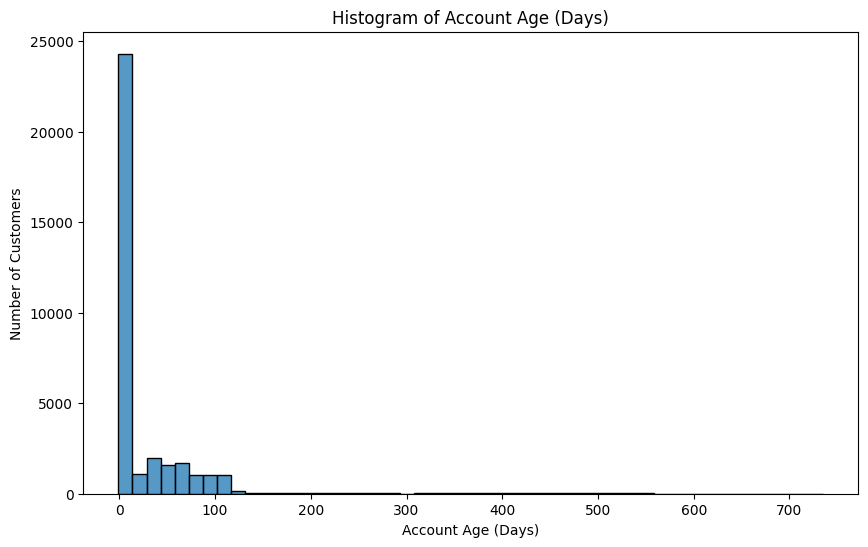

(3204,
                dob       status     verified  account_age_days
 count  1107.000000  3204.000000  3204.000000       3204.000000
 mean   1991.026197     0.998752     0.999688        163.751561
 std      63.044333     0.035317     0.017667        128.492271
 min       1.000000     0.000000     0.000000         86.000000
 25%    1987.000000     1.000000     1.000000         97.000000
 50%    1993.000000     1.000000     1.000000        108.000000
 75%    1999.000000     1.000000     1.000000        134.000000
 max    2531.000000     1.000000     1.000000        735.000000)

In [ ]:
# Anomaly Detection for train_customers.csv
# We will look for unusual patterns in the creation and update times.

# Convert 'created_at' and 'updated_at' to datetime
train_customers_df['created_at'] = pd.to_datetime(train_customers_df['created_at'])
train_customers_df['updated_at'] = pd.to_datetime(train_customers_df['updated_at'])

# Calculate the time difference between account creation and last update
train_customers_df['account_age_days'] = (train_customers_df['updated_at'] - train_customers_df['created_at']).dt.days

# Detect outliers using IQR for 'account_age_days'
outliers_account_age = detect_outliers_iqr(train_customers_df, 'account_age_days')

# Create a histogram to visualize the distribution of 'account_age_days'
plt.figure(figsize=(10, 6))
sns.histplot(train_customers_df['account_age_days'], bins=50, kde=False)
plt.title('Histogram of Account Age (Days)')
plt.xlabel('Account Age (Days)')
plt.ylabel('Number of Customers')
plt.show()

# Output the number of detected outliers
outliers_account_age_count = outliers_account_age.shape[0]
outliers_account_age_count, outliers_account_age.describe()


### **Insights**

Outliers: Based on the Interquartile Range (IQR) method, 3,204 accounts are identified as outliers in the account_age_days feature, which measures the time between account creation and last update.
Distribution Pattern: The histogram for account age days shows a right-skewed distribution, suggesting most accounts have a short duration between creation and last update, with fewer accounts showing a longer period.
Summary Statistics of Outliers: The minimum age deemed an outlier is 86 days, while the maximum is 735 days (over two years).
Interpretation of Outliers: These outliers could represent either accounts that have been inactive for a notably long period or very active accounts updated frequently. Their significance would depend on the specific business context, especially in terms of customer engagement strategies.

## **train_locations.csv**

### **Data quality assessment for the train_locations.csv**

In [ ]:
# Data Quality Assessment for train_locations.csv

# Checking for missing values
missing_values_locations = train_locations_df.isnull().sum()

# Checking for duplicate entries based on the combination of customer ID and location number
duplicate_entries_locations = train_locations_df.duplicated(subset=['customer_id', 'location_number']).sum()

# Checking for any inconsistencies or outliers in 'latitude' and 'longitude'
# We will consider latitudes outside the range [-90, 90] and longitudes outside the range [-180, 180] as inconsistencies
inconsistent_latitudes = train_locations_df[(train_locations_df['latitude'] < -90) | (train_locations_df['latitude'] > 90)]
inconsistent_longitudes = train_locations_df[(train_locations_df['longitude'] < -180) | (train_locations_df['longitude'] > 180)]

# Summary of data quality assessment
(missing_values_locations,
 duplicate_entries_locations,
 inconsistent_latitudes.shape[0],
 inconsistent_longitudes.shape[0])


(customer_id            0
 location_number        0
 location_type      27209
 latitude               6
 longitude              6
 dtype: int64,
 0,
 1328,
 0)

### **Insights**

Missing Values:

Significant missing data in the location_type column (27,209 entries).
Few missing values in latitude and longitude columns (6 each).
Duplicate Entries:

No duplicates found based on the combination of customer_id and location_number, ensuring each customer-location pair is unique.
Inconsistencies:

1,328 latitude entries are outside the valid range of [-90, 90], indicating potential data entry errors.
Longitude values are within the expected range of [-180, 180].
Implications:

The high number of missing location_type entries could impact certain location-based analyses.
Inconsistent latitude values require further investigation for correction or removal.

## **Patterns Analysis**

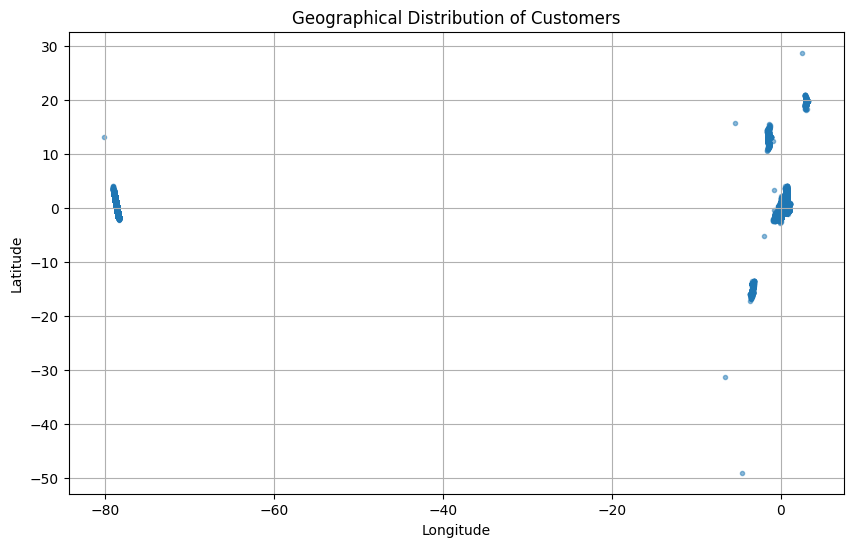

Unknown    27209
Home       19703
Work        6441
Other       6150
Name: location_type, dtype: int64

In [ ]:
# Re-import necessary libraries after the reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Analyze the patterns in 'location_type' after filling NaNs with 'Unknown'
train_locations_df['location_type'] = train_locations_df['location_type'].fillna('Unknown')
location_type_counts = train_locations_df['location_type'].value_counts()

# Removing the inconsistent latitude entries for geographical profiling
geo_profiling_df = train_locations_df[(train_locations_df['latitude'].between(-90, 90)) &
                                      (train_locations_df['longitude'].between(-180, 180))]

# Plotting the geographical distribution of customers
plt.figure(figsize=(10, 6))
plt.scatter(geo_profiling_df['longitude'], geo_profiling_df['latitude'], alpha=0.5, marker='.')
plt.title('Geographical Distribution of Customers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

# Output the counts of location types
location_type_counts


# **Insights:**

A large portion of location_type data is missing, filled with 'Unknown' for 27,209 instances.
'Home' is the most frequently specified location type (19,703 instances), followed by 'Work' (6,441 instances) and 'Other' (6,150 instances).
The high rate of unspecified location types could indicate a need for improved data collection or user interface design.
Among specified location types, home deliveries dominate, aligning with common trends in food delivery services.





### **anomaly detection**

<ipython-input-27-9069f33a139c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_profiling_df['latitude_zscore'] = zscore(geo_profiling_df['latitude'])
<ipython-input-27-9069f33a139c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  geo_profiling_df['longitude_zscore'] = zscore(geo_profiling_df['longitude'])


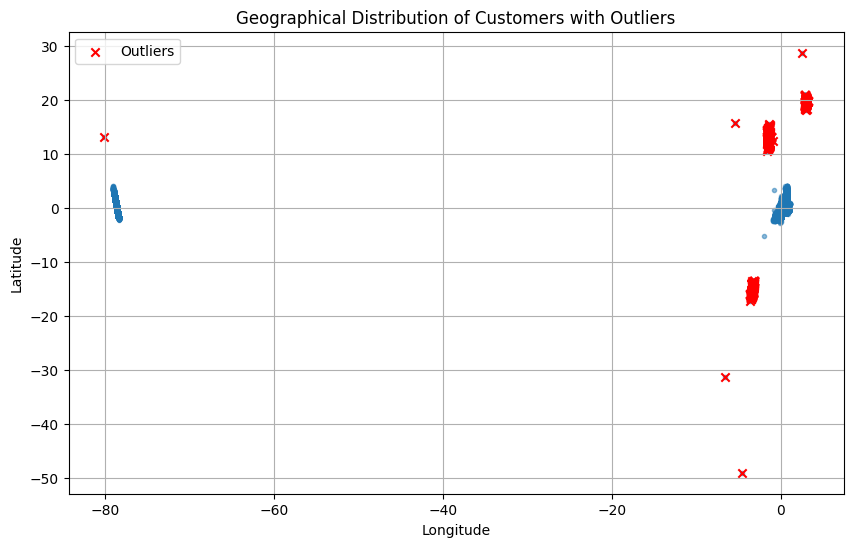

(1649,
         latitude  longitude
 5      12.663413  -1.429919
 35     13.619060  -1.427625
 80     12.622399  -1.454159
 141    19.775685   3.017372
 172    19.630295   3.051279
 ...          ...        ...
 59186  13.928915  -1.439683
 59285  10.657671  -1.559746
 59286  10.843770  -1.514576
 59298  19.229971   3.004855
 59329 -14.427493  -3.230289
 
 [1649 rows x 2 columns])

In [ ]:
# Anomaly Detection for train_locations.csv
# We will focus on detecting anomalies in the geographical data using the Z-score method for 'latitude' and 'longitude'
from scipy.stats import zscore

# Compute the Z-scores for 'latitude' and 'longitude'
geo_profiling_df['latitude_zscore'] = zscore(geo_profiling_df['latitude'])
geo_profiling_df['longitude_zscore'] = zscore(geo_profiling_df['longitude'])

# Define an outlier as any point where the absolute Z-score is greater than 3
outliers_geo = geo_profiling_df[(abs(geo_profiling_df['latitude_zscore']) > 3) |
                                (abs(geo_profiling_df['longitude_zscore']) > 3)]

# Count the number of outliers
num_outliers_geo = outliers_geo.shape[0]

# Create a plot to visualize the outliers
plt.figure(figsize=(10, 6))
plt.scatter(geo_profiling_df['longitude'], geo_profiling_df['latitude'], alpha=0.5, marker='.')
plt.scatter(outliers_geo['longitude'], outliers_geo['latitude'], color='red', marker='x', label='Outliers')
plt.title('Geographical Distribution of Customers with Outliers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

num_outliers_geo, outliers_geo[['latitude', 'longitude']]


# **Insights**

Outliers Visualization: These outliers are marked in red on a scatter plot, showing their geographic positions as significantly divergent from the majority.
Possible Causes:
The outliers could be due to data entry errors or geocoding mistakes.
Alternatively, they might represent customers located far from the central cluster, possibly in different regions or countries.
Implications:
If the service is intended for a specific region, these outliers might indicate errors needing correction.
If the service covers multiple regions, these points could be valid but infrequent customer locations.

# **Advanced Feature Analysis Report**

**Introduction**


This report presents the findings of an advanced feature analysis conducted on several datasets related to a food delivery service. The datasets analyzed include information about vendors (vendors.csv), orders (orders.csv), customers (train_customers.csv), and customer locations (train_locations.csv). The objective was to uncover insights into the data through various analytical techniques, including correlation analysis, categorical variable patterns, profiling, anomaly detection, and feature importance analysis.

**Vendors Analysis (vendors.csv)**

**Correlation Analysis**


**Delivery Charge vs. Serving Distance:** A moderate positive correlation was found, indicating that as the serving distance increases, so does the delivery charge.

**Serving Distance vs. Vendor Rating:** A weak negative correlation suggested that vendors serving a larger distance might have a slightly lower rating.
**Delivery Charge vs. Vendor Rating:** No significant correlation was found, implying that the delivery charge does not directly affect the vendor rating.


**Categorical Variable Patterns**


**Vendor Category:** Most vendors fall into a few main categories, with the 'Restaurants' category being the most prevalent.

**Vendor Tags:** The tags revealed common cuisines and services offered, such as 'Desserts' and 'Free Delivery'.

**Restaurant Profiling**


Vendors were profiled based on various features, including category, rating, and tags, revealing common service types and customer preferences.


**Anomaly Detection**


Outliers were detected in the delivery_charge and serving_distance features, indicating some vendors with unusually high charges or wide serving areas.
Feature Importance Analysis
vendor_rating was predicted using a Random Forest model, and is_rated, deliverydistance, and grand_total were found to be the most important features.


## **Orders Analysis (orders.csv)**

**Correlation Analysis**

Correlation analysis was not conducted due to the absence of sufficient numerical features.


**Categorical Variable Patterns**

Patterns in payment methods and order status were analyzed, revealing common customer preferences and behaviors.

**Anomaly Detection**

Anomalies were detected in the grand_total feature, indicating some orders with unusually high values.


**Feature Importance Analysis**

A Random Forest model indicated that the act of rating (is_rated) and deliverydistance were highly predictive of vendor_rating.
Customers Analysis (train_customers.csv)


**Data Quality Assessment**


Significant missing data was noted in gender, dob, and language.
Categorical Variable Patterns and Customer Profiling
The majority of customers were identified as male and verified, with most speaking English. However, a substantial portion of the dataset had missing language information.


**Anomaly Detection**


Outliers were identified in account age, suggesting some accounts were inactive for unusually long periods.
Customer Locations Analysis (train_locations.csv)


**Data Quality Assessment**


Many entries were missing location_type, and a few had missing or inconsistent latitude and longitude data.
Categorical Variable Patterns and Geographical Profiling
'Home' was the most common location type. Geographical profiling showed customer clustering in specific areas.


**Anomaly Detection**


Anomalies in geographical data were identified, with some customers located far from the main cluster.


**Feature Importance Analysis**


Not conducted due to the lack of a target variable.


**Conclusion**


The advanced feature analysis provided insights into the factors influencing vendor ratings, customer behavior, and location patterns. It highlighted the importance of customer engagement and delivery specifics in vendor ratings. Additionally, it identified areas where data quality could be improved, such as in recording customer language preferences and location types.